# Statistics

In [2]:
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen as uReq
import urllib.request
import re
from re import sub

import pandas as pd
import math
import requests 
import json
import numpy as np
from numpy import NaN
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
#plt.style.use(u'seaborn-paper')
plt.style.use('seaborn-white')
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 26}
plt.rc('font', **font)

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
plt.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')
plt.tick_params(labelsize=22)

import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn import datasets, linear_model
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import GridSearchCV

from bs4 import BeautifulSoup
from requests import get
from pandas import DataFrame
from tabulate import tabulate

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium import webdriver

import itertools
from itertools import chain
from IPython.core.display import HTML

import matplotlib.pyplot as plt
from decimal import Decimal

from sklearn.model_selection import ShuffleSplit
import seaborn as sb
import dtale
from datetime import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point, Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
df = pd.read_csv("Endeligt data/df_final.csv")
df = df.drop(columns=['Time', 'ZipCity', 'PriceReduction', 'HasMultipleLevels', 'SquareMetrePrice', 'SquareMetrePrice_range', 'GeomaticAVMPricePerMetre', 'GeomaticAVMPricePerMetre_range', 'Quarter', 'Year', 'YearQuarter', 'Lokation', 'SaleDateMonth', 'SaleDateQuarter'])

#with pd.option_context('display.max_colwidth', -1): 
#    display(HTML(df.head(5).to_html()))

In [4]:
df.shape

(36183, 70)

In [5]:
dtale.show(df)

In [6]:
##################################################
#############           New          #############
##################################################

df['SquareMetrePrice'] = df.SalePrice / df.WeightedFloorArea
#bins = [0, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000, 75000, 200000]
#names = ['<15000','15000-20000','20000-25000','25000-30000', '30000-35000','35000-40000','40000-45000','45000-50000','50000-75000', '75000-100000']
#d = dict(enumerate(names,1))
#df['SquareMetrePrice_range'] = np.vectorize(d.get)(np.digitize(df['SquareMetrePrice'],bins))
#df['GeomaticAVMPricePerMetre'] = df.GeomaticAVMPrice / df.WeightedFloorArea
#df['GeomaticAVMPricePerMetre_range'] = np.vectorize(d.get)(np.digitize(df['GeomaticAVMPricePerMetre'],bins))

df['SaleDate'] = pd.to_datetime(df['SaleDate'],format='%Y-%m-%d', errors='coerce')
df['OfferingEnd'] = pd.to_datetime(df['OfferingEnd'],format='%Y-%m-%d', errors='coerce')
df['OfferingStart'] = pd.to_datetime(df['OfferingStart'],format='%Y-%m-%d', errors='coerce')
df['Quarter'] = df['SaleDate'].dt.quarter
df['Year'] = df['SaleDate'].dt.year
df['YearQuarter'] = df['Year'].map(str)+ 'Q' +df['Quarter'].map(str)
df['TurnoverTime'] = (df.OfferingEnd - df.OfferingStart)

df['PriceReduction'] = ((df.AskingPrice / df.SalePrice)-1)*100
df['HasMultipleLevels'] = df['Levels'].apply(lambda x: 1 if x > 1 else 0)

df['BuildAge'] = 2019 - df['YearBuilt']
df['RemodAfterBuild'] =  df['YearRemodAdd'] - df['YearBuilt']


### Inspect Salesprice 

In [7]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    #style.use('seaborn-white')
    plt.rcParams['font.size'] = 18

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)
    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(df.loc[:,feature])
    #print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], 
               loc='best')

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot', size = 10)
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );


Skewness: 2.101459898702438
Kurtosis: 9.066212700028185


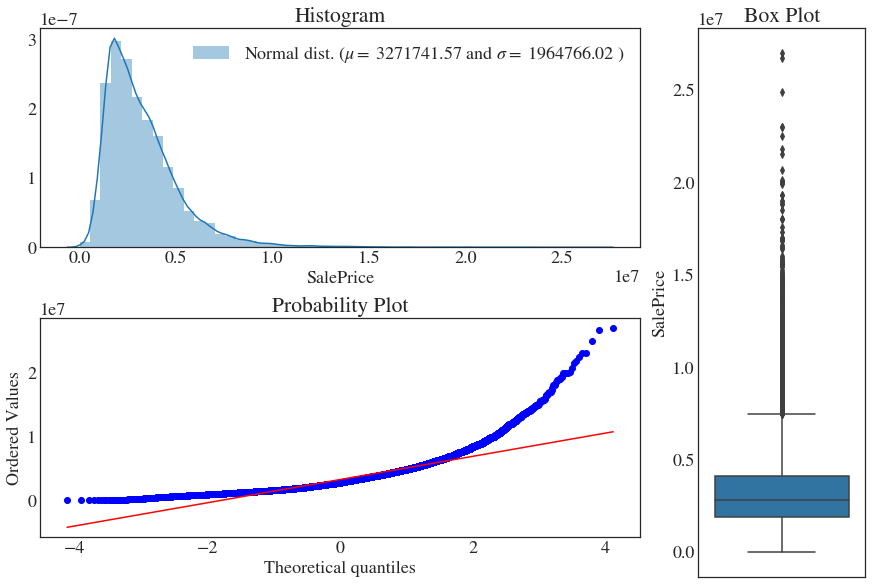

In [8]:
    
plotting_3_chart(df, 'SalePrice')

#skewness and kurtosis
print("Skewness: " + str(df['SalePrice'].skew()))
print("Kurtosis: " + str(df['SalePrice'].kurt()))

In [9]:
#df['SalePriceLog'] = np.log(df.SalePrice)

#print(len(df.loc[df['SalePriceLog'] <= 13]))
#df = df.loc[df['SalePriceLog'] > 13]

#plotting_3_chart(df, 'SalePriceLog')



In [10]:
WeightedFloorAreaBefore = df.WeightedFloorArea
SalePriceBefore = df.SalePrice

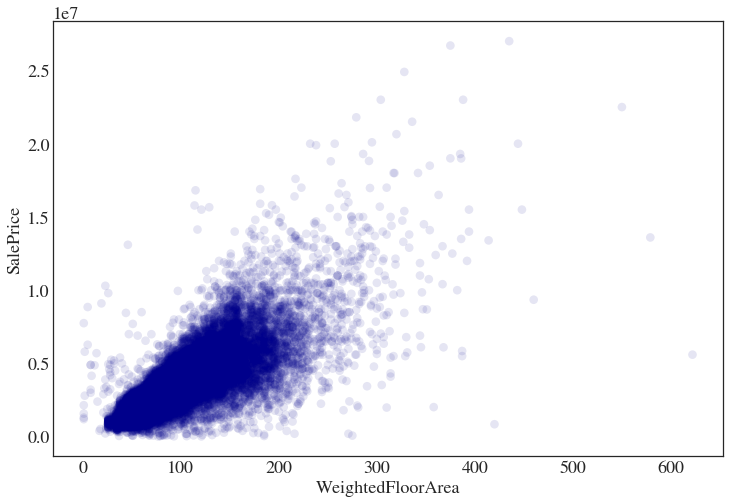

In [11]:
# Scatterplot before outliers are removed
plt.rcParams["figure.figsize"] = (12,8)
#plt.style.use('ggplot')

plt.scatter(df.WeightedFloorArea, df.SalePrice, 
            edgecolors='none', alpha=0.1, c ='darkblue', s = 75)
#plt.title('Scatterplot')
plt.rcParams['font.size'] = 18
plt.xlabel('WeightedFloorArea')
plt.ylabel('SalePrice')

#plt.suptitle('Categorical Plotting')
plt.show()

In [12]:
# Inspect possible outliers

with pd.option_context('display.max_colwidth', -1): 
    display(HTML(df.loc[(df['WeightedFloorArea'] > 400) & (df['SalePrice'] < 15000000) ].to_html()))

In [13]:
df_new = df

In [14]:
########################################
############# ASSUMPTIONS  #############
########################################
df = df_new
print(df.shape)

# We limit SalesPrice to be in range(0.5 mio to 20 mio)
print(len(df[df.SalePrice > 20000000])) # 10
df = df[df.SalePrice < 20000000]
print(len(df[df.SalePrice < 500000])) # 115
df = df[df.SalePrice > 500000]

# We limit our area to min 10 m^2 and max 400
# No house under 10 m^2 (14)
print(len(df[df['WeightedFloorArea'] < 10]))
df = df.loc[df['WeightedFloorArea'] > 10]

# No house over 150 m^2 with no toilet (29)
print(len(df[(df['WeightedFloorArea'] > 150) & (df['Toilets'] == 0)]))
df = df.loc[~((df['WeightedFloorArea'] > 150) & (df['Toilets'] == 0.0)),:]

# Note that some houses have a WeightedFloorArea that is far from the TotalFloorArea
df['FloorDiff'] = abs(df.TotalFloorArea / df.WeightedFloorArea)

# TotalFloorArea > WeightedFloorArea (48)
print(len(df[(df['FloorDiff'] > 2)]))
df = df.loc[df['FloorDiff'] < 2]

# TotalFloorArea < WeightedFloorArea (30)
print(len(df[df['FloorDiff'] < 0.5]))
df = df.loc[df['FloorDiff'] > 0.5]

df = df.drop(columns=['FloorDiff'])

# Mean of SquareMetrePrice = 35354.26294080909
m = df.SquareMetrePrice.mean()

print(m*2)
# Remove houses with SquareMetrePrice 2 as high as mean (115)
print(len(df.loc[df['SquareMetrePrice'] > m*2]))
df = df.loc[df['SquareMetrePrice'] < m*2]

# Remove houses with SquareMetrePrice 6 times as low as mean (27)
print(m/4)
print(len(df.loc[df['SquareMetrePrice'] < m/4]))
df = df.loc[df['SquareMetrePrice'] > m/4]

# Remove ovious outliers 
out = df[(abs(df.AskingPrice / df.SalePrice) > 4) | (abs(df.AskingPrice / df.SalePrice) < 0.25)] # 34
print(len(out))
df = df.drop(out.index)
out[['Address','AskingPrice', 'SalePrice', 'GeomaticAVMPrice']]

#### ADDED 
#df = df.loc[df['SalePriceLog'] < 12]

print(df.shape)

################# Save data ##################
df.to_csv('Endeligt data/df_done.csv', index=False)


(36183, 78)
10
115
14
29
48
30
70888.30203392534
115
8861.037754240668
84
20
(35702, 78)


In [15]:
df.ZipCode

0        2450
1        2450
2        2450
3        2450
4        2450
5        2450
6        2450
7        2450
8        2450
9        2450
10       2450
11       2450
12       2450
13       2450
14       2450
15       2450
16       2450
17       2450
18       2450
19       2450
20       2450
21       2450
22       2450
23       2450
24       2450
25       2450
26       2450
27       2450
28       2450
29       2450
         ... 
36153    2100
36154    2100
36155    2700
36156    2300
36157    2300
36158    2300
36159    2300
36160    2300
36161    2300
36162    2300
36163    2300
36164    2300
36165    2300
36166    2300
36167    2300
36168    2300
36169    2300
36170    2300
36171    2300
36172    2300
36173    2300
36174    2300
36175    2300
36176    2300
36177    2300
36178    2300
36179    2300
36180    2300
36181    2300
36182    2300
Name: ZipCode, Length: 35702, dtype: int64


 mu = 14.85 and sigma = 0.54

Skewness: 0.021769166017049636
Kurtosis: -0.22788926906921603


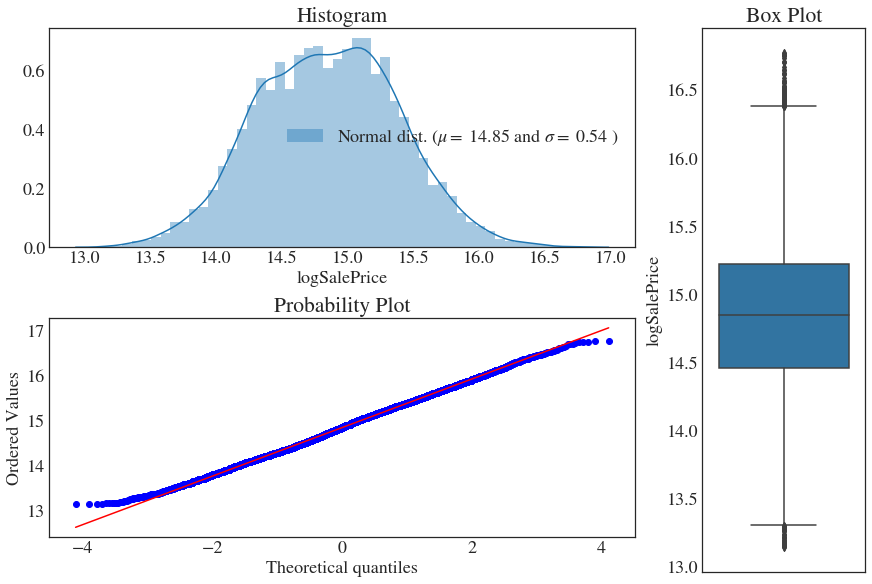

In [16]:
# For later use
df['logSalePrice'] = np.log(df.SalePrice)
plotting_3_chart(df, 'logSalePrice')

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['logSalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#skewness and kurtosis
print("Skewness: " + str(df['logSalePrice'].skew()))
print("Kurtosis: " + str(df['logSalePrice'].kurt()))

df = df.drop(columns=['logSalePrice'])

In [17]:
# After
WeightedFloorAreaAfter = df.WeightedFloorArea
SalePriceAfter = df.SalePrice

#WeightedFloorAreaBefore - df.WeightedFloorArea
SalePriceBefore.index.tolist() 
SalePriceAfter.index.tolist()

before = list(set(SalePriceBefore.index.tolist()) ^ set(SalePriceAfter.index.tolist()))
print(len(before))

OldObsSalePrice = SalePriceBefore.iloc[before]
OldObsWeightedFloorArea = WeightedFloorAreaBefore.iloc[before]

481


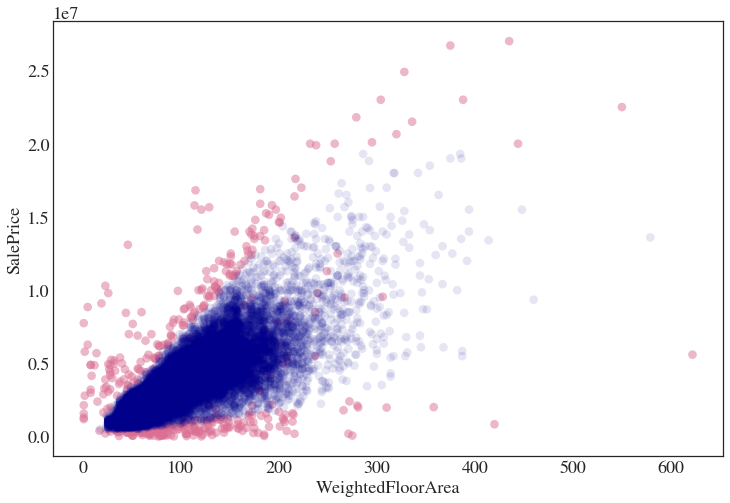

In [18]:
# Scatterplot after outliers are removed
plt.rcParams["figure.figsize"] = (12,8)
#plt.style.use('ggplot')

fig, ax = plt.subplots()

# Plot data
plt.scatter(OldObsWeightedFloorArea, OldObsSalePrice, 
            edgecolors='none', alpha=0.5, c ='palevioletred', s = 75);
plt.scatter(df.WeightedFloorArea, df.SalePrice, 
            edgecolors='none', alpha=0.1, c ='darkblue', s = 75);

# Change fontsize
#plt.rcParams['font.size'] = 18
plt.xlabel('WeightedFloorArea')
plt.ylabel('SalePrice')
plt.show()

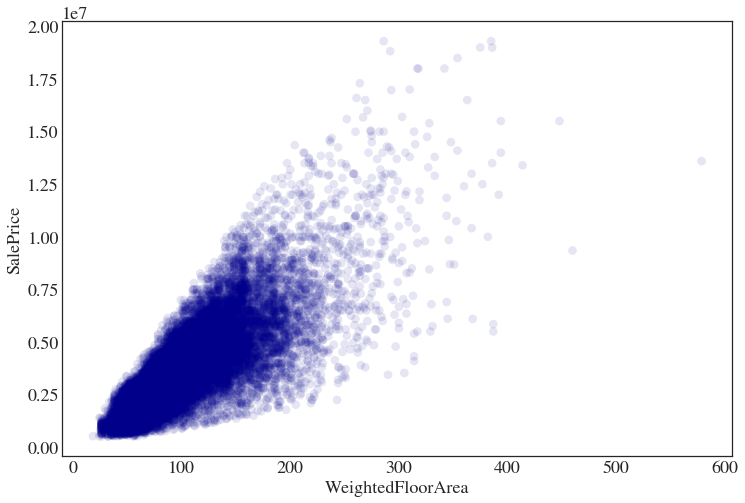

In [19]:
# Scatterplot after outliers are removed
plt.rcParams["figure.figsize"] = (12,8)
#plt.style.use('ggplot')

plt.scatter(df.WeightedFloorArea, df.SalePrice, 
            edgecolors='none', alpha=0.1, c ='darkblue', s = 75)
#plt.title('Scatterplot')
#plt.rcParams['font.size'] = 18
plt.xlabel('WeightedFloorArea')
plt.ylabel('SalePrice')

#plt.suptitle('Categorical Plotting')
plt.show()



 mu = 35378.98 and sigma = 10084.25

Skewness: 0.20515845998694704
Kurtosis: -0.08394151722577936


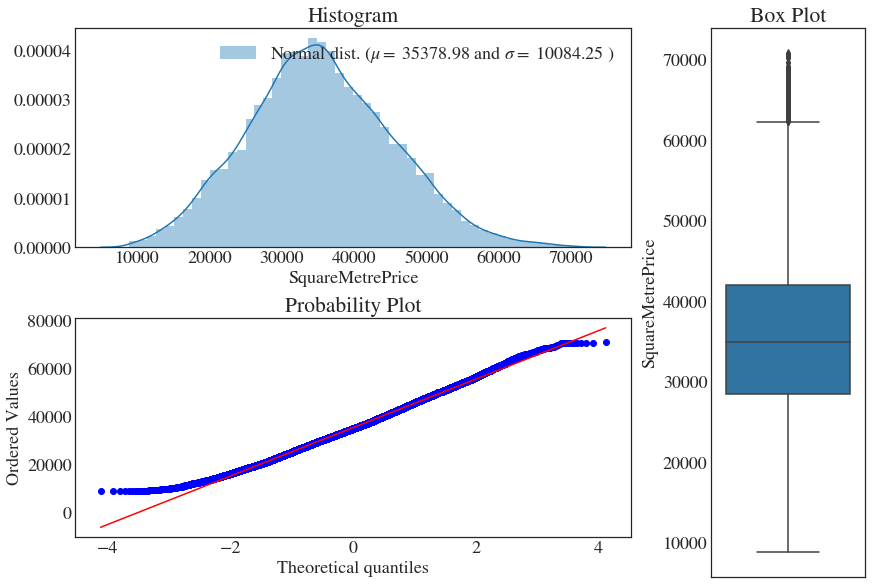

In [20]:
# 3 plots
plotting_3_chart(df, 'SquareMetrePrice')

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SquareMetrePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
#skewness and kurtosis
print("Skewness: " + str(df['SquareMetrePrice'].skew()))
print("Kurtosis: " + str(df['SquareMetrePrice'].kurt()))

### Development over time

In [22]:
#EJ14 = pd.read_csv('Endeligt data/EJ14.csv',delimiter=';',header=1, skiprows=1)

#EJ14.drop(EJ14.columns[[0, 1]], axis = 1, inplace = True)
#EJ14 = EJ14.drop([0, 1, 4]).T
#EJ14 = EJ14.rename(columns=EJ14.iloc[0]).drop(EJ14.index[0:1])

#EJ14['YM'] = pd.date_range(start='01/2006', end='03/2020', freq='M')

#EJ14 = EJ14.iloc[96:]

#plt.rcParams["figure.figsize"] = (16,7)
#fig, ax = plt.subplots()

# Plot data
#plt.plot(EJ14.iloc[:, 2], c ='lightblue', linewidth=3, label='One-family houses, Capital Region of Denmark');
#plt.plot(EJ14.iloc[:, 3], c ='lightgreen', linewidth=3, label='Owner-occupied flats, Capital Region of Denmark');


# Change fontsize
#plt.rcParams['font.size'] = 18

# Make a legend
#fig.autofmt_xdate()

#plt.ylabel('Price index')
#plt.legend(fontsize=20)

#xticks = ax.xaxis.get_major_ticks()
#for i,tick in enumerate(xticks):
#    if i%6 != 0:
#        tick.label1.set_visible(False)

#plt.show()

In [23]:
#EJ14 = pd.read_csv('Endeligt data/EJ14.csv',delimiter=';',header=1, skiprows=1)

#EJ14.drop(EJ14.columns[[0, 1]], axis = 1, inplace = True)
#EJ14 = EJ14.drop([0, 1, 4]).T
#EJ14 = EJ14.rename(columns=EJ14.iloc[0]).drop(EJ14.index[0:1])

#EJ14['YM'] = pd.date_range(start='01/2006', end='03/2020', freq='M')

#EJ14 = EJ14.iloc[96:]

#plt.rcParams["figure.figsize"] = (16,7)
#fig, ax = plt.subplots()

# Change index for PriceIndex
#HouseIndexZero = 100/ 80.7
#FlatIndexZero = 100/ 85.7
#PriceHouse = (EJ14.iloc[:, 2] * HouseIndexZero) /100
#PriceFlat = (EJ14.iloc[:, 3] * FlatIndexZero) /100

# Plot data
#plt.plot(EJ14.iloc[:, 0], c ='darkblue', linewidth=3, label='One-family houses, All of Denmark');
#plt.plot(EJ14.iloc[:, 1], c ='darkgreen', linewidth=3, label='Owner-occupied flats, All of Denmark');

#plt.plot(PriceHouse, c ='lightblue', linewidth=3, label='One-family houses, Capital Region of Denmark');
#plt.plot(PriceFlat, c ='lightgreen', linewidth=3, label='Owner-occupied flats, Capital Region of Denmark');


# Change fontsize
#plt.rcParams['font.size'] = 18

# Make a legend
#fig.autofmt_xdate()

#plt.ylabel('Price index')
#plt.legend(fontsize=20)

#xticks = ax.xaxis.get_major_ticks()
#for i,tick in enumerate(xticks):
#    if i%6 != 0:
#        tick.label1.set_visible(False)

#plt.show()

In [24]:
#MPK13 = pd.read_csv('Endeligt data/MPK13-OMXC20CAP.csv',delimiter=';',header=0,skiprows=1)
#MPK13 = MPK13.iloc[:,1:].T

#plt.rcParams["figure.figsize"] = (16,7)
#fig, ax = plt.subplots()

# Plot data
#plt.plot(MPK13[0], c ='darkblue', linewidth=3, label='OMXC20CAP');

# Change fontsize
#plt.rcParams['font.size'] = 18

# Make a legend
#fig.autofmt_xdate()

#plt.ylabel('Price index')
#plt.legend(fontsize=20)

#xticks = ax.xaxis.get_major_ticks()
#for i,tick in enumerate(xticks):
#    if i%6 != 0:
#        tick.label1.set_visible(False)

#plt.show()

In [ ]:
# Load Mortgage - note: 1 month delay manuelt
#MPK18 = pd.read_csv('Endeligt data/MPK18-MortgageCredit.csv',delimiter=';',header=1,skiprows=1)
#MPK18 = MPK18.iloc[0:,2:].T

#plt.rcParams["figure.figsize"] = (16,7)
#fig, ax = plt.subplots()

# Plot data
#plt.plot(MPK18[1], c ='darkblue', linewidth=3, label='MortgageCredit');

# Change fontsize
#plt.rcParams['font.size'] = 18

# Make a legend
#fig.autofmt_xdate()

#plt.ylabel('Rate')
#plt.legend(fontsize=20)

#xticks = ax.xaxis.get_major_ticks()
#for i,tick in enumerate(xticks):
#    if i%2 != 0:
#        tick.label1.set_visible(False)

#plt.show()

In [ ]:
# Load Unemplotment - note: 1 month delay manuelt
#AULK04 = pd.read_csv('Endeligt data/AULK04.csv',delimiter=';',header=0,skiprows=1)
#AULK04 = AULK04.iloc[0:,1:].T


#plt.rcParams["figure.figsize"] = (16,7)
#fig, ax = plt.subplots()

# Plot data
#plt.plot(AULK04[0], c ='darkblue', linewidth=3, label='Long-term unemployed');

# Change fontsize
#plt.rcParams['font.size'] = 18

# Make a legend
#fig.autofmt_xdate()

#plt.ylabel('Persons')
#plt.legend(fontsize=20)

#xticks = ax.xaxis.get_major_ticks()
#for i,tick in enumerate(xticks):
#    if i%6 != 0:
#        tick.label1.set_visible(False)

#plt.show()

In [ ]:
# Load Unemplotment - note: 1 month delay manuelt
#AULK04 = pd.read_csv('Endeligt data/AULK04.csv',delimiter=';',header=0,skiprows=1)
#AULK04 = AULK04.iloc[0:,1:].T


#plt.rcParams["figure.figsize"] = (16,7)
#fig, ax = plt.subplots()

# Plot data
#plt.plot(AULK04[1], c ='darkblue', linewidth=3, label='Long-term unemployed in per cent of labour force');

# Change fontsize
#plt.rcParams['font.size'] = 18

# Make a legend
#fig.autofmt_xdate()

#plt.ylabel('Percent')
#plt.legend(fontsize=20)

#xticks = ax.xaxis.get_major_ticks()
#for i,tick in enumerate(xticks):
#    if i%6 != 0:
#        tick.label1.set_visible(False)

#plt.show()

In [ ]:


# Load Births - note: 1 month delay manuelt
#FODDAG = pd.read_csv('Endeligt data/FODDAG.csv',delimiter=';',header=0,skiprows=1)
#FODDAG = FODDAG.iloc[0:,1:].T


#plt.rcParams["figure.figsize"] = (16,7)
#fig, ax = plt.subplots()

# Plot data
#plt.plot(FODDAG[0], c ='darkblue', linewidth=3, label='Births');

# Change fontsize
#plt.rcParams['font.size'] = 18

# Make a legend
#fig.autofmt_xdate()

#plt.ylabel('Percent')
#plt.legend(fontsize=20)

#xticks = ax.xaxis.get_major_ticks()
#for i,tick in enumerate(xticks):
#    if i%6 != 0:
#        tick.label1.set_visible(False)

#plt.show()

In [25]:
#sold_per_quater = df.YearQuarter.value_counts()
#sold_per_quater = sold_per_quater.reindex(index = ['2014Q1','2014Q2','2014Q3','2014Q4',
#                                                  '2015Q1','2015Q2','2015Q3','2015Q4',
#                                                  '2016Q1','2016Q2','2016Q3','2016Q4',
#                                                  '2017Q1','2017Q2','2017Q3','2017Q4',
#                                                  '2018Q1','2018Q2','2018Q3','2018Q4',
#                                                  '2019Q1','2019Q2','2019Q3','2019Q4'])

#print((sold_per_quater[sold_per_quater.index == '2019Q3']))
#print((sold_per_quater[sold_per_quater.index == '2019Q4']))

#sold_per_quater = (sold_per_quater[sold_per_quater.index != '2019Q4'])
#sold_per_quater = (sold_per_quater[sold_per_quater.index != '2019Q3'])



#Ejerlejlighed = df[df.Type == 'Ejerlejlighed'].YearQuarter.value_counts()
#Rækkehus = df[df.Type == 'Rækkehus'].YearQuarter.value_counts()
#Villa = df[df.Type == 'Villa'].YearQuarter.value_counts()

#Ejerlejlighed = Ejerlejlighed.reindex(index = ['2014Q1','2014Q2','2014Q3','2014Q4',
#                                                  '2015Q1','2015Q2','2015Q3','2015Q4',
#                                                  '2016Q1','2016Q2','2016Q3','2016Q4',
#                                                  '2017Q1','2017Q2','2017Q3','2017Q4',
#                                                  '2018Q1','2018Q2','2018Q3','2018Q4',
#                                                  '2019Q1','2019Q2','2019Q3','2019Q4'])

#Rækkehus = Rækkehus.reindex(index = ['2014Q1','2014Q2','2014Q3','2014Q4',
#                                                  '2015Q1','2015Q2','2015Q3','2015Q4',
#                                                  '2016Q1','2016Q2','2016Q3','2016Q4',
#                                                  '2017Q1','2017Q2','2017Q3','2017Q4',
#                                                  '2018Q1','2018Q2','2018Q3','2018Q4',
#                                                  '2019Q1','2019Q2','2019Q3','2019Q4'])

#Villa = Villa.reindex(index = ['2014Q1','2014Q2','2014Q3','2014Q4',
#                                                  '2015Q1','2015Q2','2015Q3','2015Q4',
#                                                  '2016Q1','2016Q2','2016Q3','2016Q4',
#                                                  '2017Q1','2017Q2','2017Q3','2017Q4',
#                                                  '2018Q1','2018Q2','2018Q3','2018Q4',
#                                                  '2019Q1','2019Q2','2019Q3','2019Q4'])

#Ejerlejlighed = (Ejerlejlighed[Ejerlejlighed.index != '2019Q4'])
#Ejerlejlighed = (Ejerlejlighed[Ejerlejlighed.index != '2019Q3'])

#Rækkehus = (Rækkehus[Rækkehus.index != '2019Q4'])
#Rækkehus = (Rækkehus[Rækkehus.index != '2019Q3'])

#Villa = (Villa[Villa.index != '2019Q4'])
#Villa = (Villa[Villa.index != '2019Q3'])




#plt.rcParams["figure.figsize"] = (16,7)
#fig, ax = plt.subplots()


# Change fontsize
#plt.rcParams['font.size'] = 12
#plt.style.use('ggplot')
#plt.xticks(rotation=45, horizontalalignment='right')

# Plot data
#plt.plot(sold_per_quater, c ='tab:purple', linewidth=3, label='Total');
#plt.plot(Ejerlejlighed, c ='lightgreen', linewidth=3, label='Ejerlejlighed');
#plt.plot(Villa, c ='lightblue', linewidth=3, label='Villa');
#plt.plot(Rækkehus, c ='lightpink', linewidth=3, label='Rækkehus');
# Change fontsize
#plt.rcParams['font.size'] = 12
#plt.legend(fontsize=14)
# Make a legend
#fig.autofmt_xdate()
#plt.ylabel('Number of houses sold')
#plt.legend(fontsize=20)


#xticks = ax.xaxis.get_major_ticks()
#for i,tick in enumerate(xticks):
#    if i%2 != 0:
#        tick.label1.set_visible(False)

#plt.show()


In [26]:
############### SALG JF FINANSDANMARK ###############

#FinansDk = pd.read_excel(r'/Users/joje/Desktop/Speciale/Endeligt data/Boligmarkedsstatistikken_SolgteBoliger.xlsx', 
#                         sheet_name='Ark1', skiprows=0)

#FinansDk = FinansDk.T



#plt.rcParams["figure.figsize"] = (16,7)
#fig, ax = plt.subplots()


#plt.ylabel('Number of houses sold')
#plt.plot(FinansDk[0], c ='tab:purple', linewidth=3);

#fig.autofmt_xdate()
#xticks = ax.xaxis.get_major_ticks()
#for i,tick in enumerate(xticks):
#    if i%2 != 0:
#        tick.label1.set_visible(False)

#plt.show()

In [27]:
QuarterM2 = np.round(df.groupby('YearQuarter', as_index=False).agg({"SquareMetrePrice": ['count', 'mean','std', 'median', 'min', 'max']}),2)
QuarterM2

YearQuarter SquareMetrePrice                                          \
                          count      mean       std    median       min   
0       2014Q1              875  27830.65   7424.49  27696.63  10242.31   
1       2014Q2             1022  29358.47   7982.26  28979.99   8898.31   
2       2014Q3             1081  28984.97   7943.82  28703.70   9380.63   
3       2014Q4             1161  28872.34   7640.81  28550.72   9562.50   
4       2015Q1             1447  30900.29   8384.40  30274.65   9398.50   
5       2015Q2             1548  32377.10   8892.03  31925.10   9645.39   
6       2015Q3             1431  32834.22   8739.44  32417.58   9524.82   
7       2015Q4             1274  32423.74   8954.43  31344.00   9554.26   
8       2016Q1             1433  33670.88   8823.49  32888.89   8967.39   
9       2016Q2             1735  34930.76   8781.51  34201.75   9632.35   
10      2016Q3             1687  35350.63   8984.43  34591.84   9000.00   
11      2016Q4             1532  35178.49   9552.72  34632.37   8876.92   
12      2017Q1             1841  36408.97   9256.29  35932.58   8928.57   
13      2017Q2             2025  37451.46   9730.35  37234.04   9558.82   
14      2017Q3             1917  38240.00  10078.06  37803.03   9056.12   
15      2017Q4             1815  37547.04  10554.37  37128.71   9791.67   
16      2018Q1             1757  39110.17  10409.50  38750.00   9066.67   
17      2018Q2             1909  39360.78  10189.88  39204.55   9913.79   
18      2018Q3             1862  38073.34  10542.95  37623.71   9455.36   
19      2018Q4             1838  36841.66  10743.56  37087.12   9490.91   
20      2019Q1             1641  38725.59  10377.52  38571.43   9117.65   
21      2019Q2             1896  38073.16  10142.50  37627.26   8956.61   
22      2019Q3              975  36777.43  10681.83  36776.32   8921.88   

              
         max  
0   57327.59  
1   63356.16  
2   70454.55  
3   56081.08  
4   68846.15  
5   70618.27  
6   66949.15  
7   63779.53  
8   70670.73  
9   70578.49  
10  70886.52  
11  70707.07  
12  70414.20  
13  70408.16  
14  70398.77  
15  68000.00  
16  70385.00  
17  69767.44  
18  68439.72  
19  68931.03  
20  69222.22  
21  68855.93  
22  70689.66

2020-07-11 14:56:35,326 - WARNING  - No handles with labels found to put in legend.


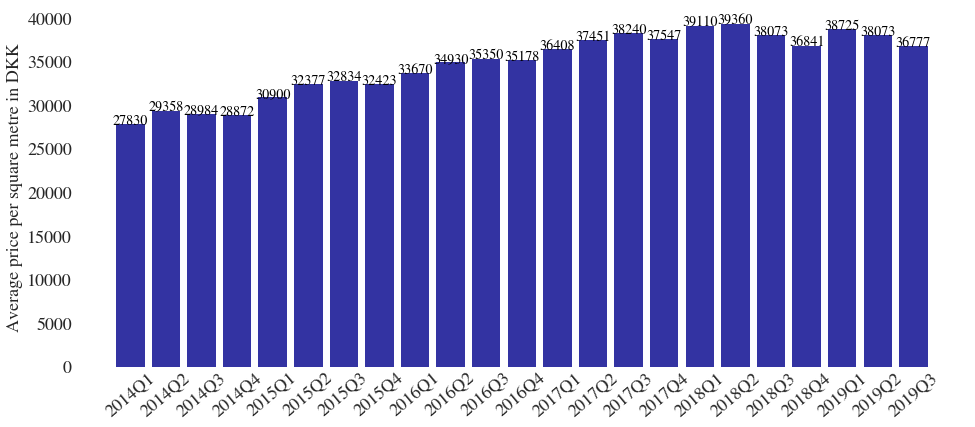

In [28]:
plt.figure(figsize=(16,10))
opacity = 0.8

# Plot the data
data_line = plt.bar(QuarterM2['YearQuarter'], QuarterM2['SquareMetrePrice']['mean'], color='darkblue', alpha=opacity)

# Change fontsize
plt.rcParams['font.size'] = 20

# Make a legend
plt.legend()
plt.xticks(rotation = 40)

#
plt.subplots_adjust(bottom= 0.6, top = 1.1)

#plt.title('Average price per m2 in different areas of Copenhagen', fontsize=16)

# get rid of the frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# remove all the ticks and directly label each bar with respective value
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
plt.ylabel('Average price per square metre in DKK')

# direct label each bar with Y axis values
for bari in data_line:
    height = bari.get_height()
    plt.gca().text(bari.get_x() + bari.get_width()/2, bari.get_height()-0.2, str(int(height)),
                 ha='center', color='black', fontsize=14)
    
#plt.savefig("Averagepricem2cph.png", bbox_inches="tight")
#plt.show()

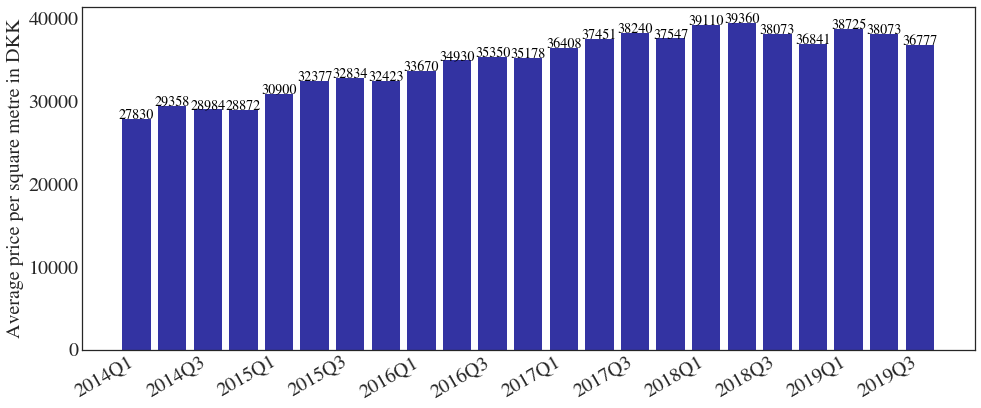

In [29]:

plt.rcParams["figure.figsize"] = (16,7)
fig, ax = plt.subplots()


# Change fontsize
#plt.rcParams['font.size'] = 12
#plt.xticks(rotation=45, horizontalalignment='right')

plt.bar(QuarterM2['YearQuarter'], QuarterM2['SquareMetrePrice']['mean'], color='darkblue', alpha=opacity)

plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
plt.ylabel('Average price per square metre in DKK')

fig.autofmt_xdate()
xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%2 != 0:
        tick.label1.set_visible(False)
        
# direct label each bar with Y axis values
for bari in data_line:
    height = bari.get_height()
    plt.gca().text(bari.get_x() + bari.get_width()/2, bari.get_height()-0.2, str(int(height)),
                 ha='center', color='black', fontsize=14)
    
plt.show()

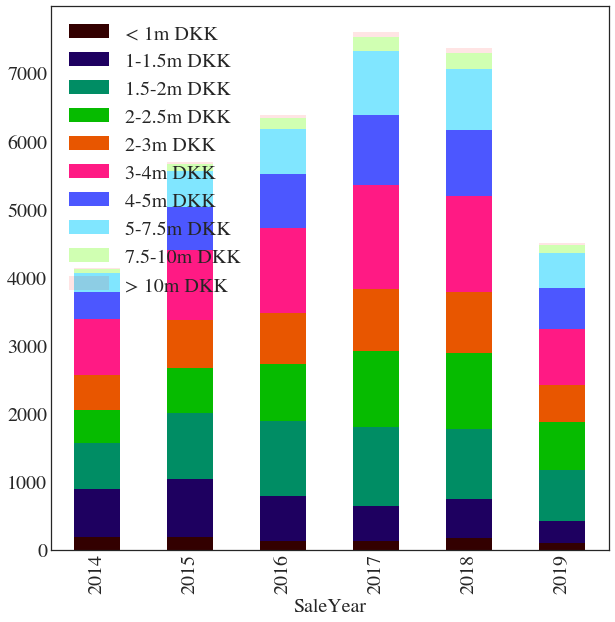

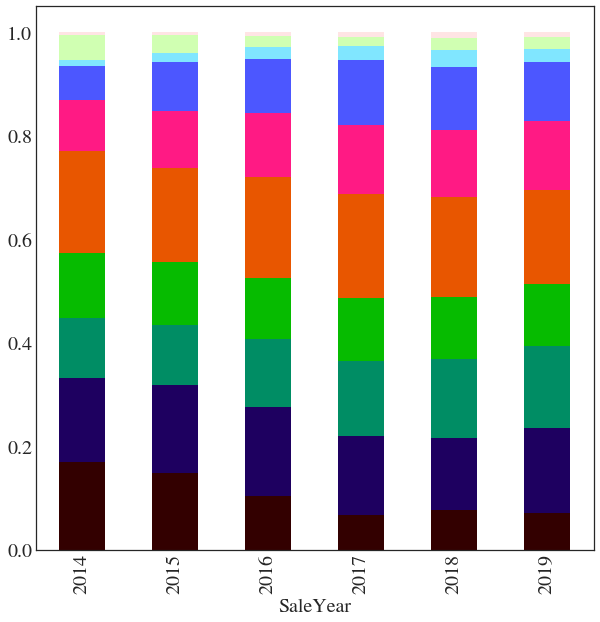

In [30]:
# Sold houses by price range
from matplotlib.colors import ListedColormap

def generate_colormap(N):
    arr = np.arange(N)/N
    N_up = int(math.ceil(N/7)*7)
    arr.resize(N_up)
    arr = arr.reshape(7,N_up//7).T.reshape(-1)
    ret = matplotlib.cm.hsv(arr)
    n = ret[:,3].size
    a = n//2
    b = n-a
    for i in range(3):
        ret[0:n//2,i] *= np.arange(0.2,1,0.8/a)
    ret[n//2:,3] *= np.arange(1,0.1,-0.9/b)
#     print(ret)
    return ret

#plt.get_cmap('Paired')


bins=[0,1000000,1500000,2000000,2500000,3000000,4000000,5000000,7500000, 10000000,50000000]
choices =['< 1m DKK','1-1.5m DKK','1.5-2m DKK','2-2.5m DKK','2-3m DKK','3-4m DKK','4-5m DKK','5-7.5m DKK','7.5-10m DKK','> 10m DKK']
df['SalePriceRange']=pd.cut(df['SalePrice'],bins=bins,labels=choices)

df['SaleDate'] = pd.to_datetime(df['SaleDate'], format='%Y-%m-%d', errors='coerce')
df['SaleYear'] = df['SaleDate'].dt.year

data_crosstab = pd.crosstab(df.SalePriceRange, df.SaleYear, margins = True) 

#print(data_crosstab.to_latex())
#print(data_crosstab)

plt.rcParams["figure.figsize"] = (10,10)
HouseAbs = df.groupby(['SaleYear', 'SalePriceRange']).size().reset_index().pivot(columns='SalePriceRange', index='SaleYear', values=0)
HouseAbs.plot(kind='bar', stacked=True, cmap=ListedColormap(generate_colormap(100*3)))
# Change fontsize
#plt.rcParams['font.size'] = 12
plt.legend(fontsize=20)
plt.show()

plt.rcParams["figure.figsize"] = (10,10)
HouseProcent = df.groupby("SaleYear")['SalePriceRange'].value_counts(normalize=True).unstack()
HouseProcent.plot(kind='bar', stacked=True, cmap=ListedColormap(generate_colormap(100*3)), legend=None)
# Change fontsize
#plt.rcParams['font.size'] = 12
#plt.legend(fontsize=18)

plt.show()


In [31]:
HouseProcent

SalePriceRange  1-1.5m DKK  1.5-2m DKK  2-2.5m DKK  2-3m DKK  3-4m DKK  \
SaleYear                                                                 
2014              0.169848    0.161633    0.116212  0.125393  0.197149   
2015              0.149123    0.169298    0.115614  0.122632  0.181579   
2016              0.103961    0.173164    0.130578  0.117113  0.194771   
2017              0.067649    0.152014    0.145696  0.121084  0.200316   
2018              0.076704    0.140375    0.151914  0.119875  0.193185   
2019              0.072030    0.164007    0.157801  0.120567  0.181516   

SalePriceRange  4-5m DKK  5-7.5m DKK  7.5-10m DKK  < 1m DKK  > 10m DKK  
SaleYear                                                                
2014            0.098575    0.066924     0.011597  0.047838   0.004832  
2015            0.110526    0.093333     0.017368  0.034561   0.005965  
2016            0.123845    0.104587     0.023955  0.020197   0.007828  
2017            0.135167    0.124506     0.026454  0.018294   0.008818  
2018            0.130057    0.121368     0.032175  0.024301   0.010046  
2019            0.132092    0.115470     0.024379  0.023493   0.008644

In [32]:
# Houes > 4 millions
print(HouseProcent.iloc[0:1][['4-5m DKK','5-7.5m DKK','7.5-10m DKK','> 10m DKK']].sum(axis=1))
print(HouseProcent.iloc[4:5][['4-5m DKK','5-7.5m DKK','7.5-10m DKK','> 10m DKK']].sum(axis=1))


# Houes \in (1.5-4) millions
print(HouseProcent.iloc[0:1][['1.5-2m DKK','2-2.5m DKK','2-3m DKK','3-4m DKK']].sum(axis=1))
print(HouseProcent.iloc[4:5][['1.5-2m DKK','2-2.5m DKK','2-3m DKK','3-4m DKK']].sum(axis=1))


# Houes < 1.5 million
print(HouseProcent.iloc[0:1][['< 1m DKK','1-1.5m DKK']].sum(axis=1))
print(HouseProcent.iloc[4:5][['< 1m DKK','1-1.5m DKK']].sum(axis=1))

SaleYear
2014    0.181928
dtype: float64
SaleYear
2018    0.293646
dtype: float64
SaleYear
2014    0.600387
dtype: float64
SaleYear
2018    0.605349
dtype: float64
SaleYear
2014    0.217685
dtype: float64
SaleYear
2018    0.101005
dtype: float64


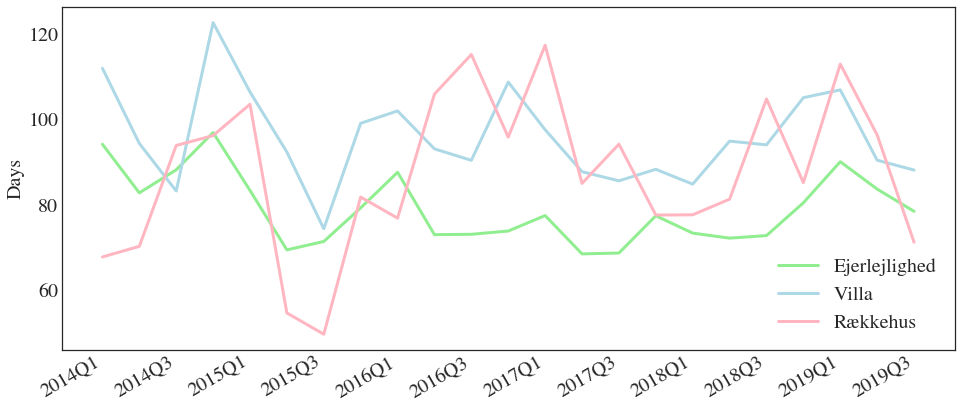

In [33]:
df['DaysTurnoverTime'] = df.TurnoverTime.dt.days

#QuarterType = np.round(df.groupby(['Type', 'YearQuarter'], as_index=False).agg({"DaysTurnoverTime": ['count', 'mean','std', 'median', 'min', 'max']}),2)
QuarterType = np.round(df.groupby(['Type', 'YearQuarter'], as_index=False).agg({"DaysTurnoverTime": ['mean']}),2)


Ejerlejlighed = QuarterType[QuarterType.Type == 'Ejerlejlighed']
Rækkehus = QuarterType[QuarterType.Type == 'Rækkehus']
Villa = QuarterType[QuarterType.Type == 'Villa']

plt.rcParams["figure.figsize"] = (16,7)
#plt.style.use('ggplot')

fig, ax = plt.subplots()
ax.plot(Ejerlejlighed.YearQuarter,Ejerlejlighed.DaysTurnoverTime, c='lightgreen', label='Ejerlejlighed', linewidth=3)
ax.plot(Villa.YearQuarter,Villa.DaysTurnoverTime, c='lightblue', label='Villa', linewidth=3)
plt.plot(Rækkehus.YearQuarter,Rækkehus.DaysTurnoverTime, c ='lightpink', label='Rækkehus', linewidth=3);

#plt.xticks(rotation=45, horizontalalignment='right')
fig.autofmt_xdate()
plt.legend(fontsize=20)
plt.ylabel('Days')
#plt.rcParams['font.size'] = 12
#plt.legend(fontsize=14)

xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%2 != 0:
        tick.label1.set_visible(False)
plt.show()


### Development across cities

In [34]:
df.SalePrice.mean()

3251839.5743375723

In [35]:
pd.options.display.float_format = '{:.0f}'.format

GroupCity = np.round(df.groupby('City', as_index=False).agg({"SalePrice": ['count', 'mean','std', 'median', 'min', 'max']}),2)
column_names = ['group', 'N', 'mean', 'std', 'median', 'min', 'max']
GroupCity.columns = column_names 
GroupCity = GroupCity.set_index('group')

print(GroupCity.to_latex())

\begin{tabular}{lrrrrrr}
\toprule
{} &     N &    mean &     std &  median &     min &      max \\
group           &       &         &         &         &         &          \\
\midrule
Brønshøj        &  1820 & 2925203 & 1460054 & 2800000 &  525000 &  8575000 \\
Frederiksberg   &  3911 & 3512576 & 1956021 & 2995000 &  640000 & 16000000 \\
Frederiksberg C &  1771 & 4603899 & 2209230 & 4300000 &  646000 & 19000000 \\
København K     &  2547 & 4296880 & 2251339 & 3825000 &  518500 & 19300000 \\
København N     &  2576 & 2472626 & 1161265 & 2222500 &  510000 & 10850000 \\
København NV    &  1880 & 2233801 & 1238042 & 1825000 &  590000 &  8700000 \\
København S     &  8060 & 2962826 & 1528981 & 2680000 &  515000 & 12995000 \\
København SV    &  1398 & 2842330 & 1342332 & 2745000 &  546873 & 12100000 \\
København V     &  1920 & 3725310 & 1771823 & 3500000 &  550000 & 13525000 \\
København Ø     &  4496 & 3740609 & 2182382 & 3100000 &  575000 & 19300000 \\
Nordhavn        &   329 & 5387531 

In [36]:
GroupCityMean = df.groupby('City').mean()
PricePerSquareMetreMean = np.mean(df['SquareMetrePrice'])

print(PricePerSquareMetreMean)

35378.979478577305


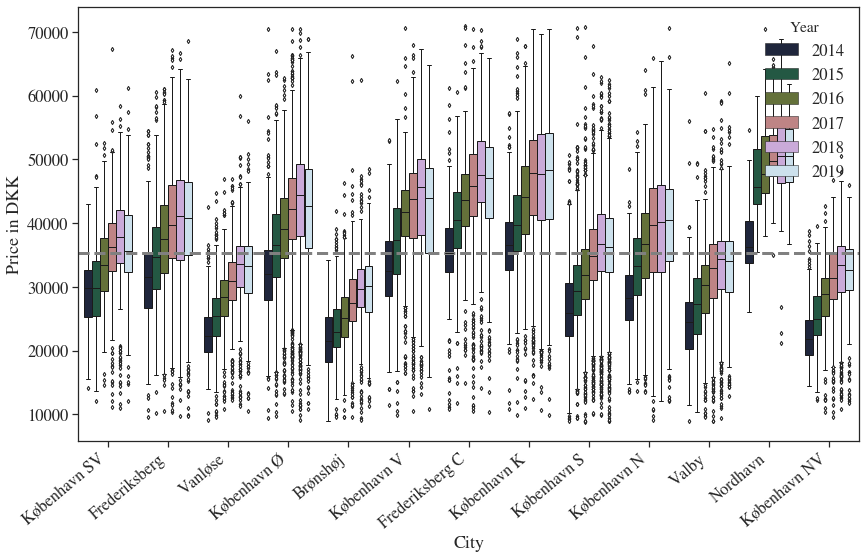

In [37]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})

flierprops = dict(markerfacecolor='1', markersize=3,
              linestyle='none')


# Change size
plt.rcParams["figure.figsize"] = (14,8)
# Change fontsize
#plt.rcParams['font.size'] = 14
# Make a legend
plt.xticks(rotation = 35)

#plt.style.use('ggplot')
plt.xticks(rotation=40, horizontalalignment='right')
sns.boxplot(y='SquareMetrePrice', x='City', 
            data=df, 
            palette="cubehelix",
            hue='Year', linewidth=1,flierprops=flierprops );
plt.axhline(PricePerSquareMetreMean, label='Average square metre price in Copenhagen', linestyle='--', color='gray', linewidth=3.0)
plt.ylabel('Price in DKK')
#plt.legend(fontsize=18)


plt.show()

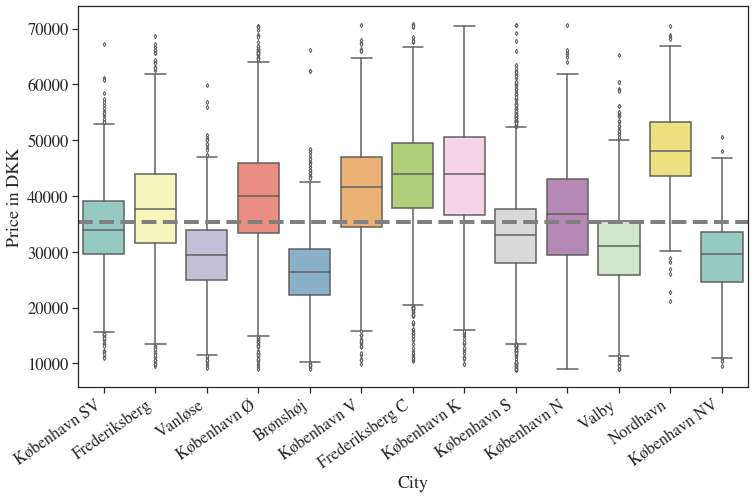

In [38]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})

# Change size
plt.rcParams["figure.figsize"] = (12,7)
# Change fontsize
#plt.rcParams['font.size'] = 14
# Make a legend
#plt.style.use('ggplot')

sns.boxplot(x="City", y="SquareMetrePrice", data=df, palette="Set3", flierprops=flierprops)
plt.axhline(PricePerSquareMetreMean, label='Average square metre price in Copenhagen', linestyle='--', color='gray', linewidth=4.0)
plt.xticks(rotation=35, horizontalalignment='right')
plt.ylabel('Price in DKK')
plt.show()

In [39]:
df.WeightedFloorArea.mean()

91.0841409444849

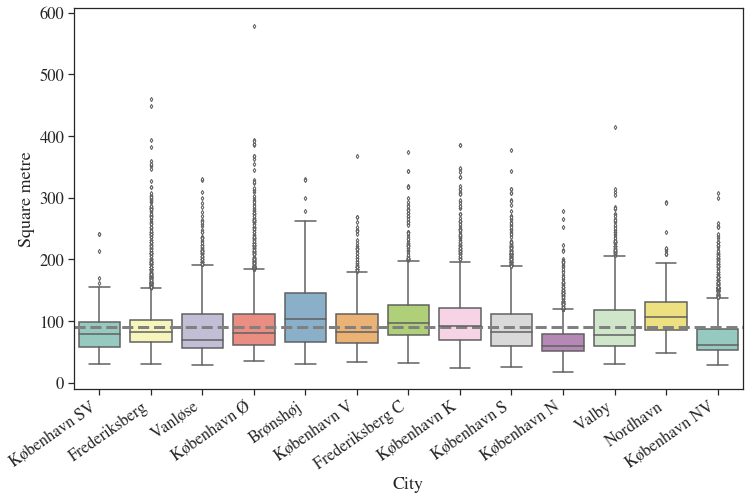

In [40]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})

# Change size
plt.rcParams["figure.figsize"] = (12,7)
# Change fontsize
#plt.rcParams['font.size'] = 14
# Make a legend
#plt.style.use('ggplot')

sns.boxplot(x="City", y="WeightedFloorArea", data=df, palette="Set3", flierprops=flierprops)
plt.axhline(df.WeightedFloorArea.mean(), label='Average square metre in Copenhagen', linestyle='--', color='gray', linewidth=3.0)
plt.xticks(rotation=35, horizontalalignment='right')
plt.ylabel('Square metre')
plt.show()

In [41]:
GroupType = np.round(df.groupby('Type', as_index=False).agg({"WeightedFloorArea": ['count', 'mean','std', 'median', 'min', 'max']}),2)
GroupType


#print(GroupType.to_latex())

Type WeightedFloorArea                        
                             count mean std median min max
0  Ejerlejlighed             31407   82  34     74  18 392
1       Rækkehus              1441  140  37    134  74 394
2          Villa              2854  163  48    157  49 579

In [42]:
GroupType = np.round(df.groupby('City', as_index=False).agg({"WeightedFloorArea": ['count', 'mean','std', 'median', 'min', 'max']}),2)
GroupType


#print(GroupType.to_latex())

City WeightedFloorArea                        
                                count mean std median min max
0          Brønshøj              1820  110  49    104  31 331
1     Frederiksberg              3911   92  43     83  31 460
2   Frederiksberg C              1771  107  44     97  32 375
3       København K              2547  100  47     92  24 386
4       København N              2576   68  26     60  18 278
5      København NV              1880   78  41     62  29 307
6       København S              8060   89  38     82  26 377
7      København SV              1398   81  26     79  31 242
8       København V              1920   92  38     83  34 367
9       København Ø              4496   94  47     81  36 579
10         Nordhavn               329  110  37    107  48 293
11            Valby              2992   93  45     77  30 414
12          Vanløse              2002   90  47     70  28 330

In [43]:
GroupCityType = np.round(df.groupby(['City', 'Type']).agg({"SquareMetrePrice": ['count', 'mean','std', 'median', 'min', 'max']}),2)
GroupCityType

SquareMetrePrice                               
                                         count  mean   std median   min   max
City            Type                                                         
Brønshøj        Ejerlejlighed              898 25311  5912  25517  9016 66207
                Rækkehus                   152 28077  6166  26947  9645 45250
                Villa                      770 27566  7133  27419  9589 62500
Frederiksberg   Ejerlejlighed             3665 37397  9241  37500  9562 67204
                Rækkehus                    88 45952  9313  46600 24324 68624
                Villa                      158 40418 10305  40192 10638 66176
Frederiksberg C Ejerlejlighed             1749 42952  9748  43902 10425 70887
                Villa                       22 51032 10750  54301 32092 68528
København K     Ejerlejlighed             2452 43391 10702  44185  9894 70513
                Rækkehus                    92 39343  9646  36618 16017 67857
                Villa                        3 56586  4750  54545 53198 62016
København N     Ejerlejlighed             2575 36246  9984  36842  9056 70690
                Villa                        1 36057   nan  36057 36057 36057
København NV    Ejerlejlighed             1640 28773  6493  29454  9559 48056
                Rækkehus                    56 30698  6013  31010 16698 44113
                Villa                      184 30342  6862  30526 10455 50543
København S     Ejerlejlighed             6874 33084  7915  33166  8877 70707
                Rækkehus                   409 35840  7846  35315  9714 70618
                Villa                      777 30723  8898  30594  8957 69143
København SV    Ejerlejlighed             1397 34065  7866  33983 10937 67327
                Villa                        1 28333   nan  28333 28333 28333
København V     Ejerlejlighed             1889 40101  9921  41447  9853 70578
                Rækkehus                    31 48960  9740  50000 16506 64071
København Ø     Ejerlejlighed             4261 39047  9759  39878  9381 70385
                Rækkehus                   199 45112 12716  46875  9067 70455
                Villa                       36 33434 13317  31399 11871 61582
Nordhavn        Ejerlejlighed              320 48255  7907  48023 21250 70504
                Rækkehus                     9 48687  5865  49244 37755 59921
Valby           Ejerlejlighed             2206 30261  7158  30732  9491 60382
                Rækkehus                   296 32828  7574  33913  8929 65190
                Villa                      490 30566  8912  30528  9036 59155
Vanløse         Ejerlejlighed             1481 28827  6338  29423  9851 50000
                Rækkehus                   109 33998  7828  34811  9554 50913
                Villa                      412 29045  7970  28723  9127 59900

In [44]:
GroupCityType = np.round(df.groupby(['Type']).agg({"SquareMetrePrice": ['count', 'mean','std', 'median', 'min', 'max']}),2)
GroupCityType

print(GroupCityType.to_latex())


\begin{tabular}{lrrrrrr}
\toprule
{} & \multicolumn{6}{l}{SquareMetrePrice} \\
{} &            count &  mean &   std & median &  min &   max \\
Type          &                  &       &       &        &      &       \\
\midrule
Ejerlejlighed &            31407 & 35784 & 10034 &  35465 & 8877 & 70887 \\
Rækkehus      &             1441 & 36547 & 10360 &  35301 & 8929 & 70618 \\
Villa         &             2854 & 30333 &  9059 &  29698 & 8957 & 69143 \\
\bottomrule
\end{tabular}



In [45]:
1441/len(df)
2854/len(df)
#31407/len(df)

#(1441/len(df) + 2854/len(df) + 31407/len(df))

0.07993949918772057

In [46]:
np.round(df.groupby(['Type']).agg({"SquareMetrePrice": ['count','mean']}),2)

#np.round(df.groupby(['Type']).agg({"SquareMetrePrice": ['mean']}),2).iloc[0]


SquareMetrePrice      
                         count  mean
Type                                
Ejerlejlighed            31407 35784
Rækkehus                  1441 36547
Villa                     2854 30333

In [47]:
(770 + 490)/ 2854
(770)/ 2854

0.2697967764540995

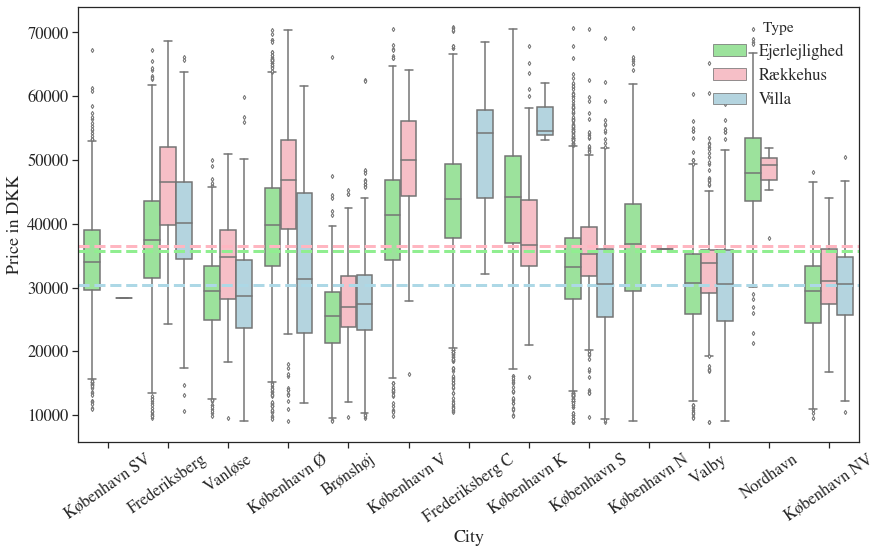

In [48]:
flatui = ['lightgreen', 'lightpink', 'lightblue']
#sns.palplot(sns.color_palette(flatui))

sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})


# Change size
plt.rcParams["figure.figsize"] = (14,8)
# Change fontsize
plt.rcParams['font.size'] = 14
# Make a legend
plt.xticks(rotation = 35)

#plt.style.use('ggplot')
#plt.xticks(rotation=45, horizontalalignment='right')
sns.boxplot(y='SquareMetrePrice', x='City', 
            data=df, 
            palette=flatui,
            hue='Type', flierprops=flierprops);
plt.ylabel('Price in DKK')
plt.axhline(35784, label='Average square metre price for Ejerlejligheder', linestyle='--', color='lightgreen', linewidth=3.0)
plt.axhline(36547, label='Average square metre price for Rækkehus', linestyle='--', color='lightpink', linewidth=3.0)
plt.axhline(30333, label='Average square metre price for Villa', linestyle='--', color='lightblue', linewidth=3.0)
#plt.legend(fontsize=14)


plt.show()

ValueError: Could not interpret input 'Square metre'

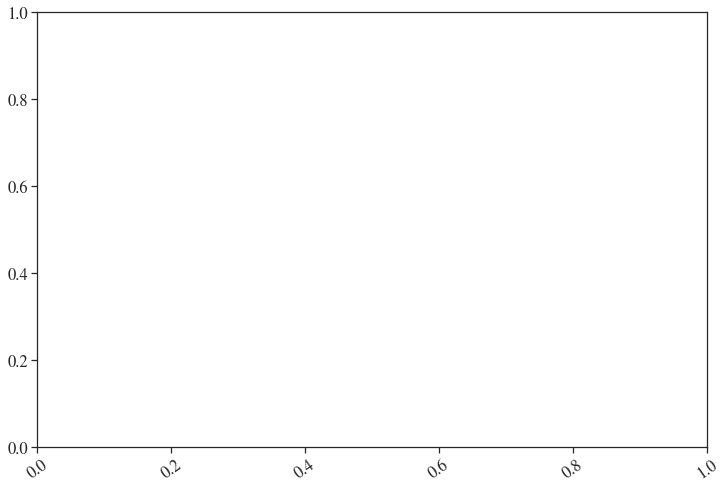

In [49]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})

# Change size
plt.rcParams["figure.figsize"] = (12,8)
# Change fontsize
#plt.rcParams['font.size'] = 14
# Make a legend
plt.xticks(rotation = 35)

#plt.style.use('ggplot')
#plt.xticks(rotation=45, horizontalalignment='right')
sns.boxplot(y='Square metre', x='City', 
            data=df, 
            palette="cubehelix",
            hue='Type', flierprops=flierprops);
#plt.ylabel('Average cost per square meter')
#plt.axhline(PricePerSquareMetreMean, label='Averager square metre price in Copenhagen', linestyle='--', color='gray', linewidth=4.0)


plt.show()

In [ ]:
FloorAreaMean = np.mean(df['WeightedFloorArea'])

# Change size
plt.rcParams["figure.figsize"] = (12,8)
# Change fontsize
#plt.rcParams['font.size'] = 14
# Make a legend
plt.xticks(rotation = 35)
#plt.style.use('ggplot')

sns.boxplot(x="City", y="WeightedFloorArea", data=df, flierprops=flierprops, palette="Set3")
plt.axhline(FloorAreaMean, linestyle='--', color='grey')
plt.xticks(rotation=35, horizontalalignment='right')
plt.show()

In [50]:
df.EnergyLabel

GroupType = np.round(df.groupby('EnergyLabel', as_index=False).agg({"WeightedFloorArea": ['count', 'mean','std', 'median', 'min', 'max']}),2)
GroupType


#print(GroupType.to_latex())

EnergyLabel WeightedFloorArea                        
                          count mean std median min max
0           A              2227  115  31    112  35 317
1           B              2637  105  27    102  31 345
2           C              8117   89  38     83  26 394
3           D             15924   83  41     70  18 579
4           E              4774   92  50     72  26 414
5           F              1077  112  57     98  33 448
6      Fredet               579  116  57    103  24 392
7           G               367  118  63    103  40 460

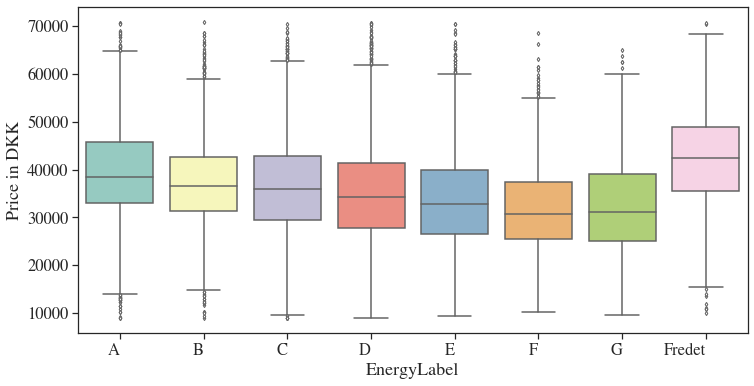

In [51]:
# EnergyLabel vs SquareMetrePrice
ordered_EnergyLabel = ['A','B','C','D','E','F','G','Fredet']

# Change size
plt.rcParams["figure.figsize"] = (12,6)
# Change fontsize
#plt.rcParams['font.size'] = 14
# Make a legend
plt.xticks(rotation = 35)
#plt.style.use('ggplot')

sns.boxplot(x="EnergyLabel", y="SquareMetrePrice", data=df, 
            flierprops=flierprops, palette="Set3", order=ordered_EnergyLabel)
plt.xticks(rotation=0, horizontalalignment='right')
plt.ylabel('Price in DKK')

plt.show()

/Users/joje/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



<Figure size 720x720 with 0 Axes>

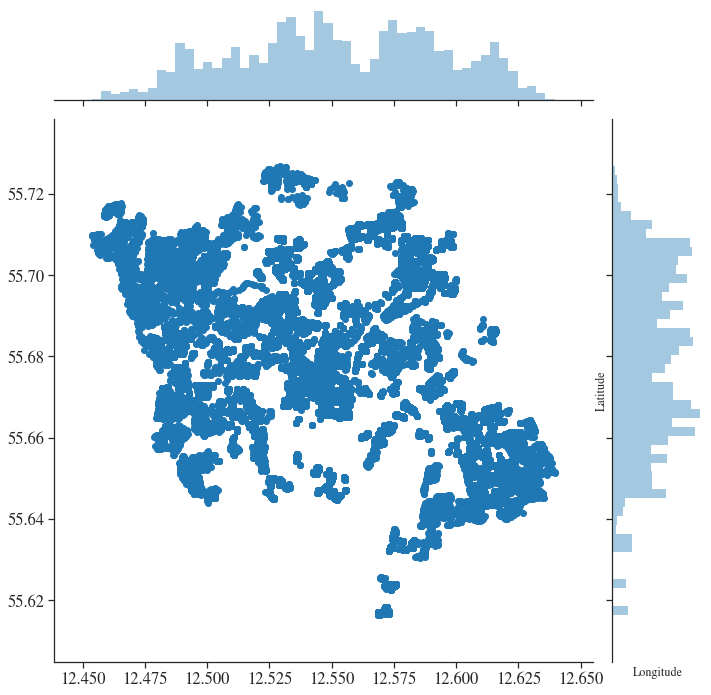

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [52]:
# Visualizing the location of the houses based on latitude and longitude.

plt.figure(figsize=(10,10))
sns.jointplot(x=df.Longitude.values, y=df.Latitude.values, size=10)
plt.ylabel('Latitude', fontsize=12)
plt.xlabel('Longitude', fontsize=12)
plt.show()
sns.despine

#Latitude

### A closer look at relation between Latest selling price and other variables

In [53]:
df_cor = df.copy()

cat = len(df_cor.select_dtypes(include=['object']).columns)
num = len(df_cor.select_dtypes(include=['int64','float64']).columns)
print('Total Features: ', cat, 'categorical', '+',
      num, 'numerical', '=', cat+num, 'features')

corrmat = df_cor.corr()


Total Features:  19 categorical + 57 numerical = 76 features


### Numerical Features

In [57]:
# Remove distance variables
df.iloc[:, :44].columns

col_physical_characteristics = ['Address', 'AskingPrice', 'BasementArea', 'Bathrooms', 'BurglaryRisk',
       'CloudburstRisk', 'EnergyLabel', 'FloorAreaBuilding', 'FloorsTotal',
       'GeomaticAVMPrice', 'HeatSource', 'Kitchen', 'LandValue',
       'LargestParty', 'Latitude', 'Levels', 'LinkBoligsiden', 'LinkGeo',
       'Longitude', 'MASL', 'NoiseMeasurement', 'OfferingEnd', 'OfferingStart',
       'OuterWallMat', 'RadonRisk', 'Roofing', 'Rooms', 'SaleDate',
       'SalePrice', 'TaxableValue', 'Toilets', 'TotalFloorArea', 'Type',
       'TypeHouse', 'ValDate', 'VoteDistrict', 'VoterTurnout',
       'WeightedFloorArea', 'WorthPreserving', 'YearBuilt', 'YearRemodAdd',
       'TurnoverTime', 'ZipCode', 'City', 'SquareMetrePrice',
       'Quarter', 'Year', 'YearQuarter',
       'PriceReduction', 'HasMultipleLevels']

StatsNum = np.round(df[col_physical_characteristics].describe(), 2).T[['count', 'mean', 'std', 'min', 'max']]
StatsNum

count                     mean                      std  \
AskingPrice        35702                  3375793                  1932277   
BasementArea       35702                        6                       43   
Bathrooms          35702                        1                        0   
FloorAreaBuilding  35702                     4288                     6966   
FloorsTotal        35702                        5                        2   
GeomaticAVMPrice   35578                  3792910                  2039403   
LandValue          35646                   374418                   492521   
Latitude           35702                       56                        0   
Levels             35702                        1                        0   
Longitude          35702                       13                        0   
MASL               35702                        8                        6   
Rooms              35702                        3                        1   
SalePrice          35702                  3251840                  1867317   
TaxableValue       35646                  1896304                  1111188   
Toilets            35702                        1                        0   
TotalFloorArea     35702                       89                       39   
VoterTurnout       35702                       84                        4   
WeightedFloorArea  35702                       91                       43   
WorthPreserving    35702                        0                        1   
YearBuilt          35702                     1938                       47   
YearRemodAdd       35702                     1948                       44   
TurnoverTime       35702  79 days 17:56:30.667189  87 days 02:27:40.942123   
ZipCode            35702                     2181                      352   
SquareMetrePrice   35702                    35379                    10084   
Quarter            35702                        2                        1   
Year               35702                     2017                        2   
PriceReduction     35702                        6                       24   
HasMultipleLevels  35702                        0                        0   

                               min                 max  
AskingPrice                 375000            22000000  
BasementArea                     0                4807  
Bathrooms                        0                   4  
FloorAreaBuilding               36               76211  
FloorsTotal                      1                  30  
GeomaticAVMPrice            420000            27923263  
LandValue                        0             9281800  
Latitude                        56                  56  
Levels                           1                   3  
Longitude                       12                  13  
MASL                             0                  37  
Rooms                            1                  17  
SalePrice                   510000            19300000  
TaxableValue                110000            13100000  
Toilets                          0                  22  
TotalFloorArea                  18                 546  
VoterTurnout                    71                  90  
WeightedFloorArea               18                 579  
WorthPreserving                  0                   9  
YearBuilt                     1623                2019  
YearRemodAdd                  1624                2019  
TurnoverTime       0 days 00:00:00  2167 days 00:00:00  
ZipCode                       1051                2720  
SquareMetrePrice              8877               70887  
Quarter                          1                   4  
Year                          2014                2019  
PriceReduction                 -74                 296  
HasMultipleLevels                0                   1

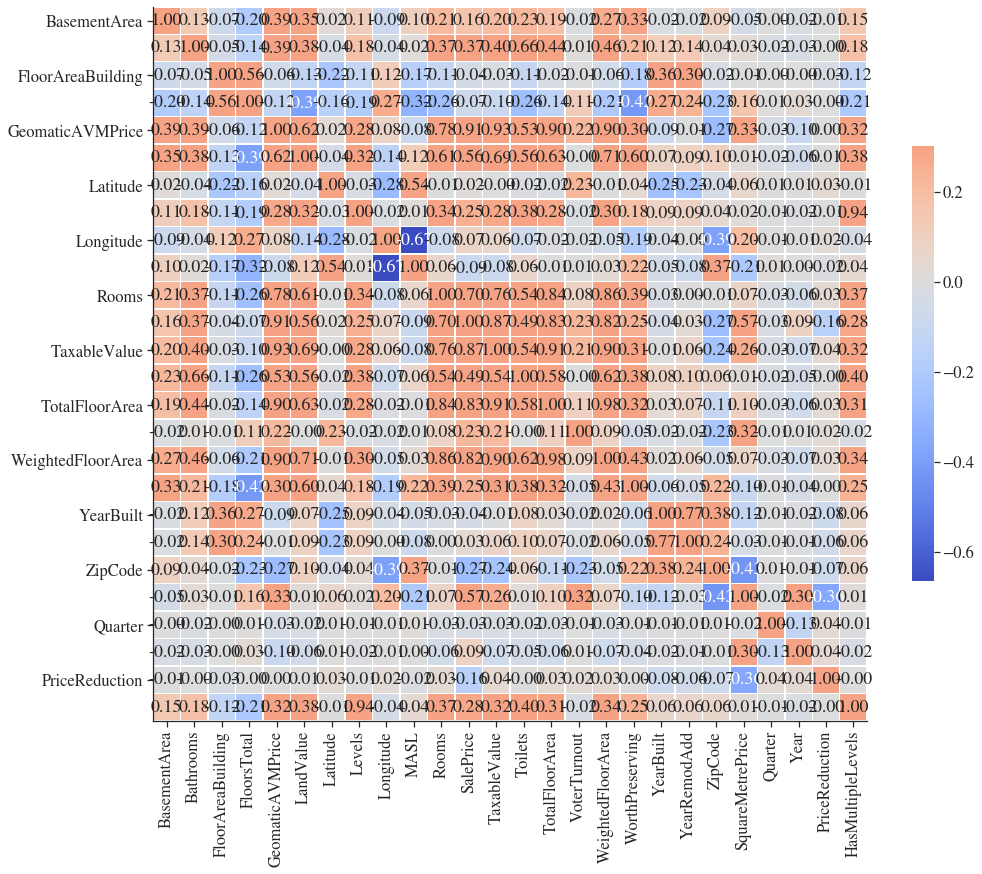

In [58]:
corr = df[col_physical_characteristics].select_dtypes(include=['float64', 'int64']).iloc[:,1:].corr()

g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g.figure.set_size_inches(16,16)
    
plt.show()

In [59]:
# Correlation between attributes with SalePrice
corr_list = corr['SalePrice'].sort_values(axis=0, ascending=False).iloc[1:]
corr_list

GeomaticAVMPrice     1
TaxableValue         1
TotalFloorArea       1
WeightedFloorArea    1
Rooms                1
SquareMetrePrice     1
LandValue            1
Toilets              0
Bathrooms            0
HasMultipleLevels    0
Levels               0
WorthPreserving      0
VoterTurnout         0
BasementArea         0
Year                 0
Longitude            0
YearRemodAdd         0
Latitude             0
Quarter             -0
FloorAreaBuilding   -0
YearBuilt           -0
FloorsTotal         -0
MASL                -0
PriceReduction      -0
ZipCode             -0
Name: SalePrice, dtype: float64

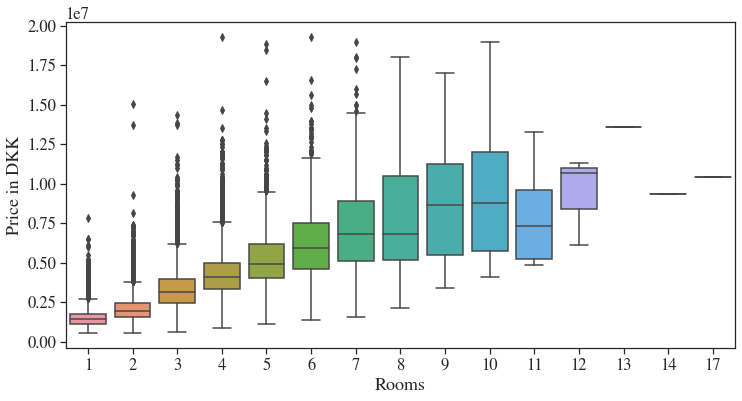

In [60]:
# Rooms vs SalePrice
sns.boxplot(x=df['Rooms'], y=df['SalePrice'])
plt.ylabel('Price in DKK')
plt.show()

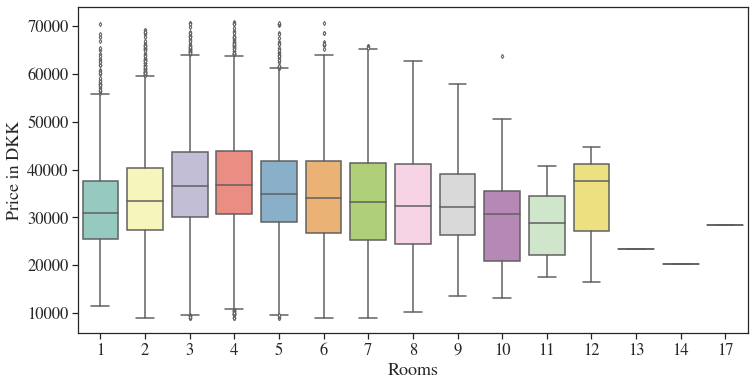

In [61]:
# Rooms vs SquareMetrePrice

plt.rcParams["figure.figsize"] = (12,6)

sns.boxplot(x=df['Rooms'], y=df['SquareMetrePrice'], flierprops=flierprops, palette="Set3")
plt.ylabel('Price in DKK')
plt.show()


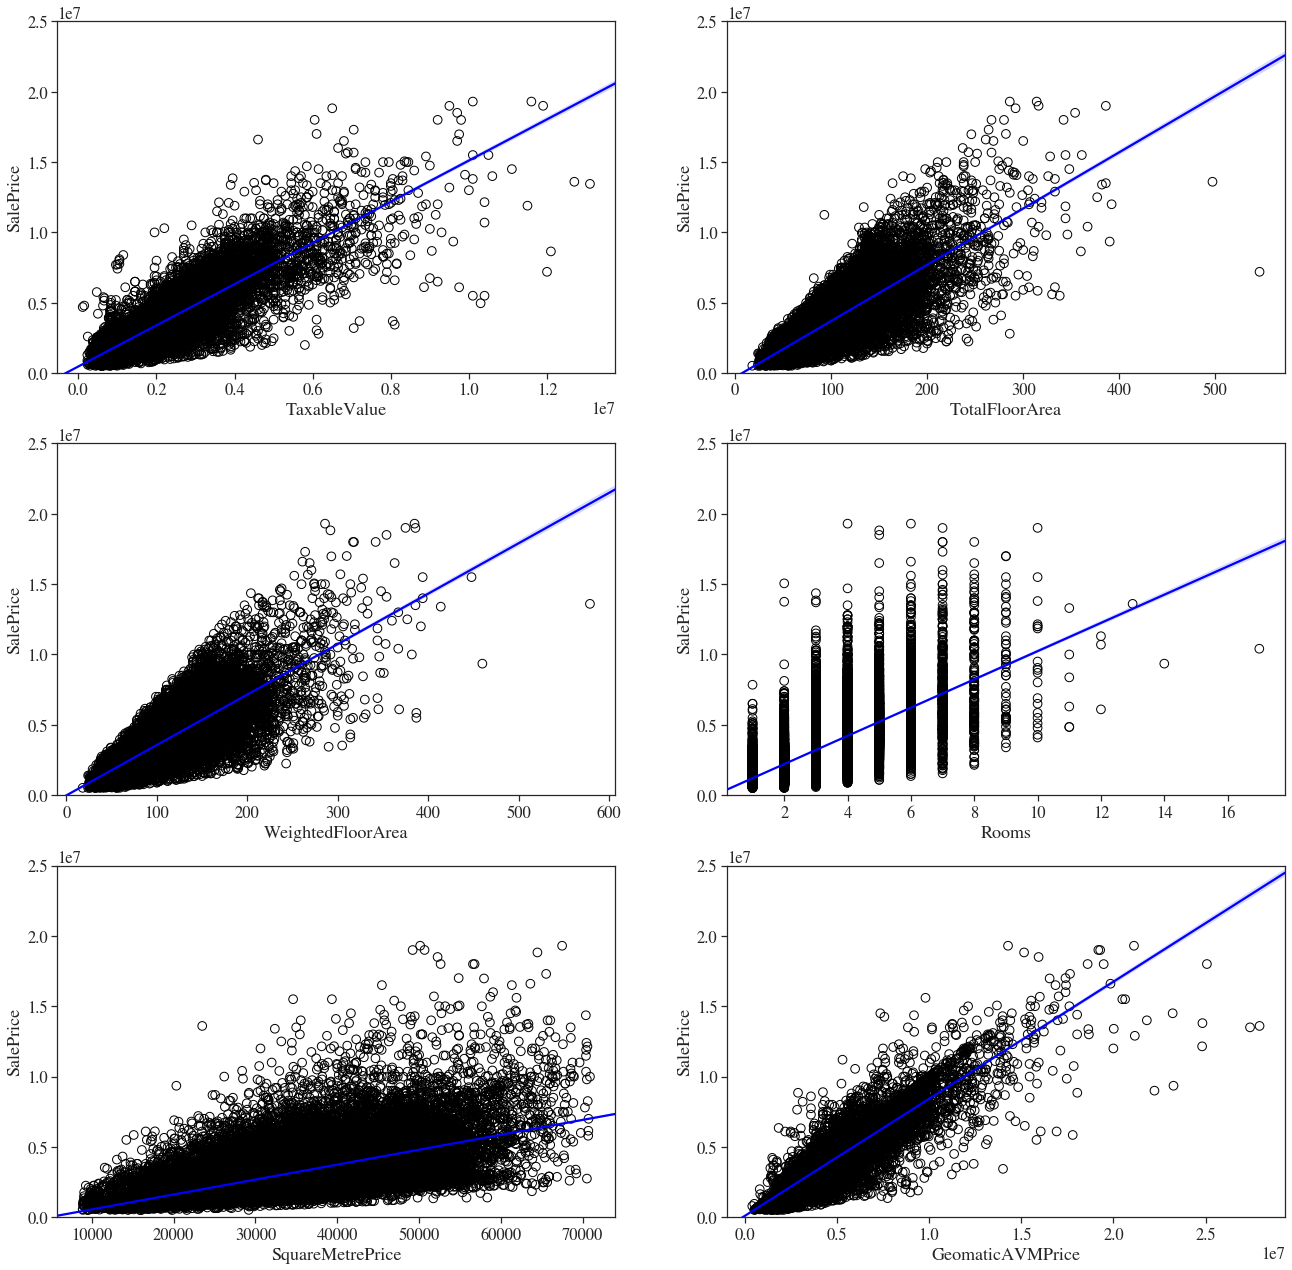

In [62]:
# Scatter plotting the top related to SalePrice
plt.figure(figsize=(22, 22))
k = 6

for i in range(k):
    ii = '32'+str(i)
    plt.subplot(ii)
    feature = corr_list.index.values[i]
    plt.scatter(df[feature], df['SalePrice'], facecolors='none', edgecolors='k', s=75)
    sns.regplot(x=feature, y='SalePrice', data=df, scatter=False, color='b')
    ax=plt.gca()
    ax.set_ylim([0,25000000])

/Users/joje/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning:

The `size` parameter has been renamed to `height`; pleaes update your code.

/Users/joje/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

/Users/joje/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



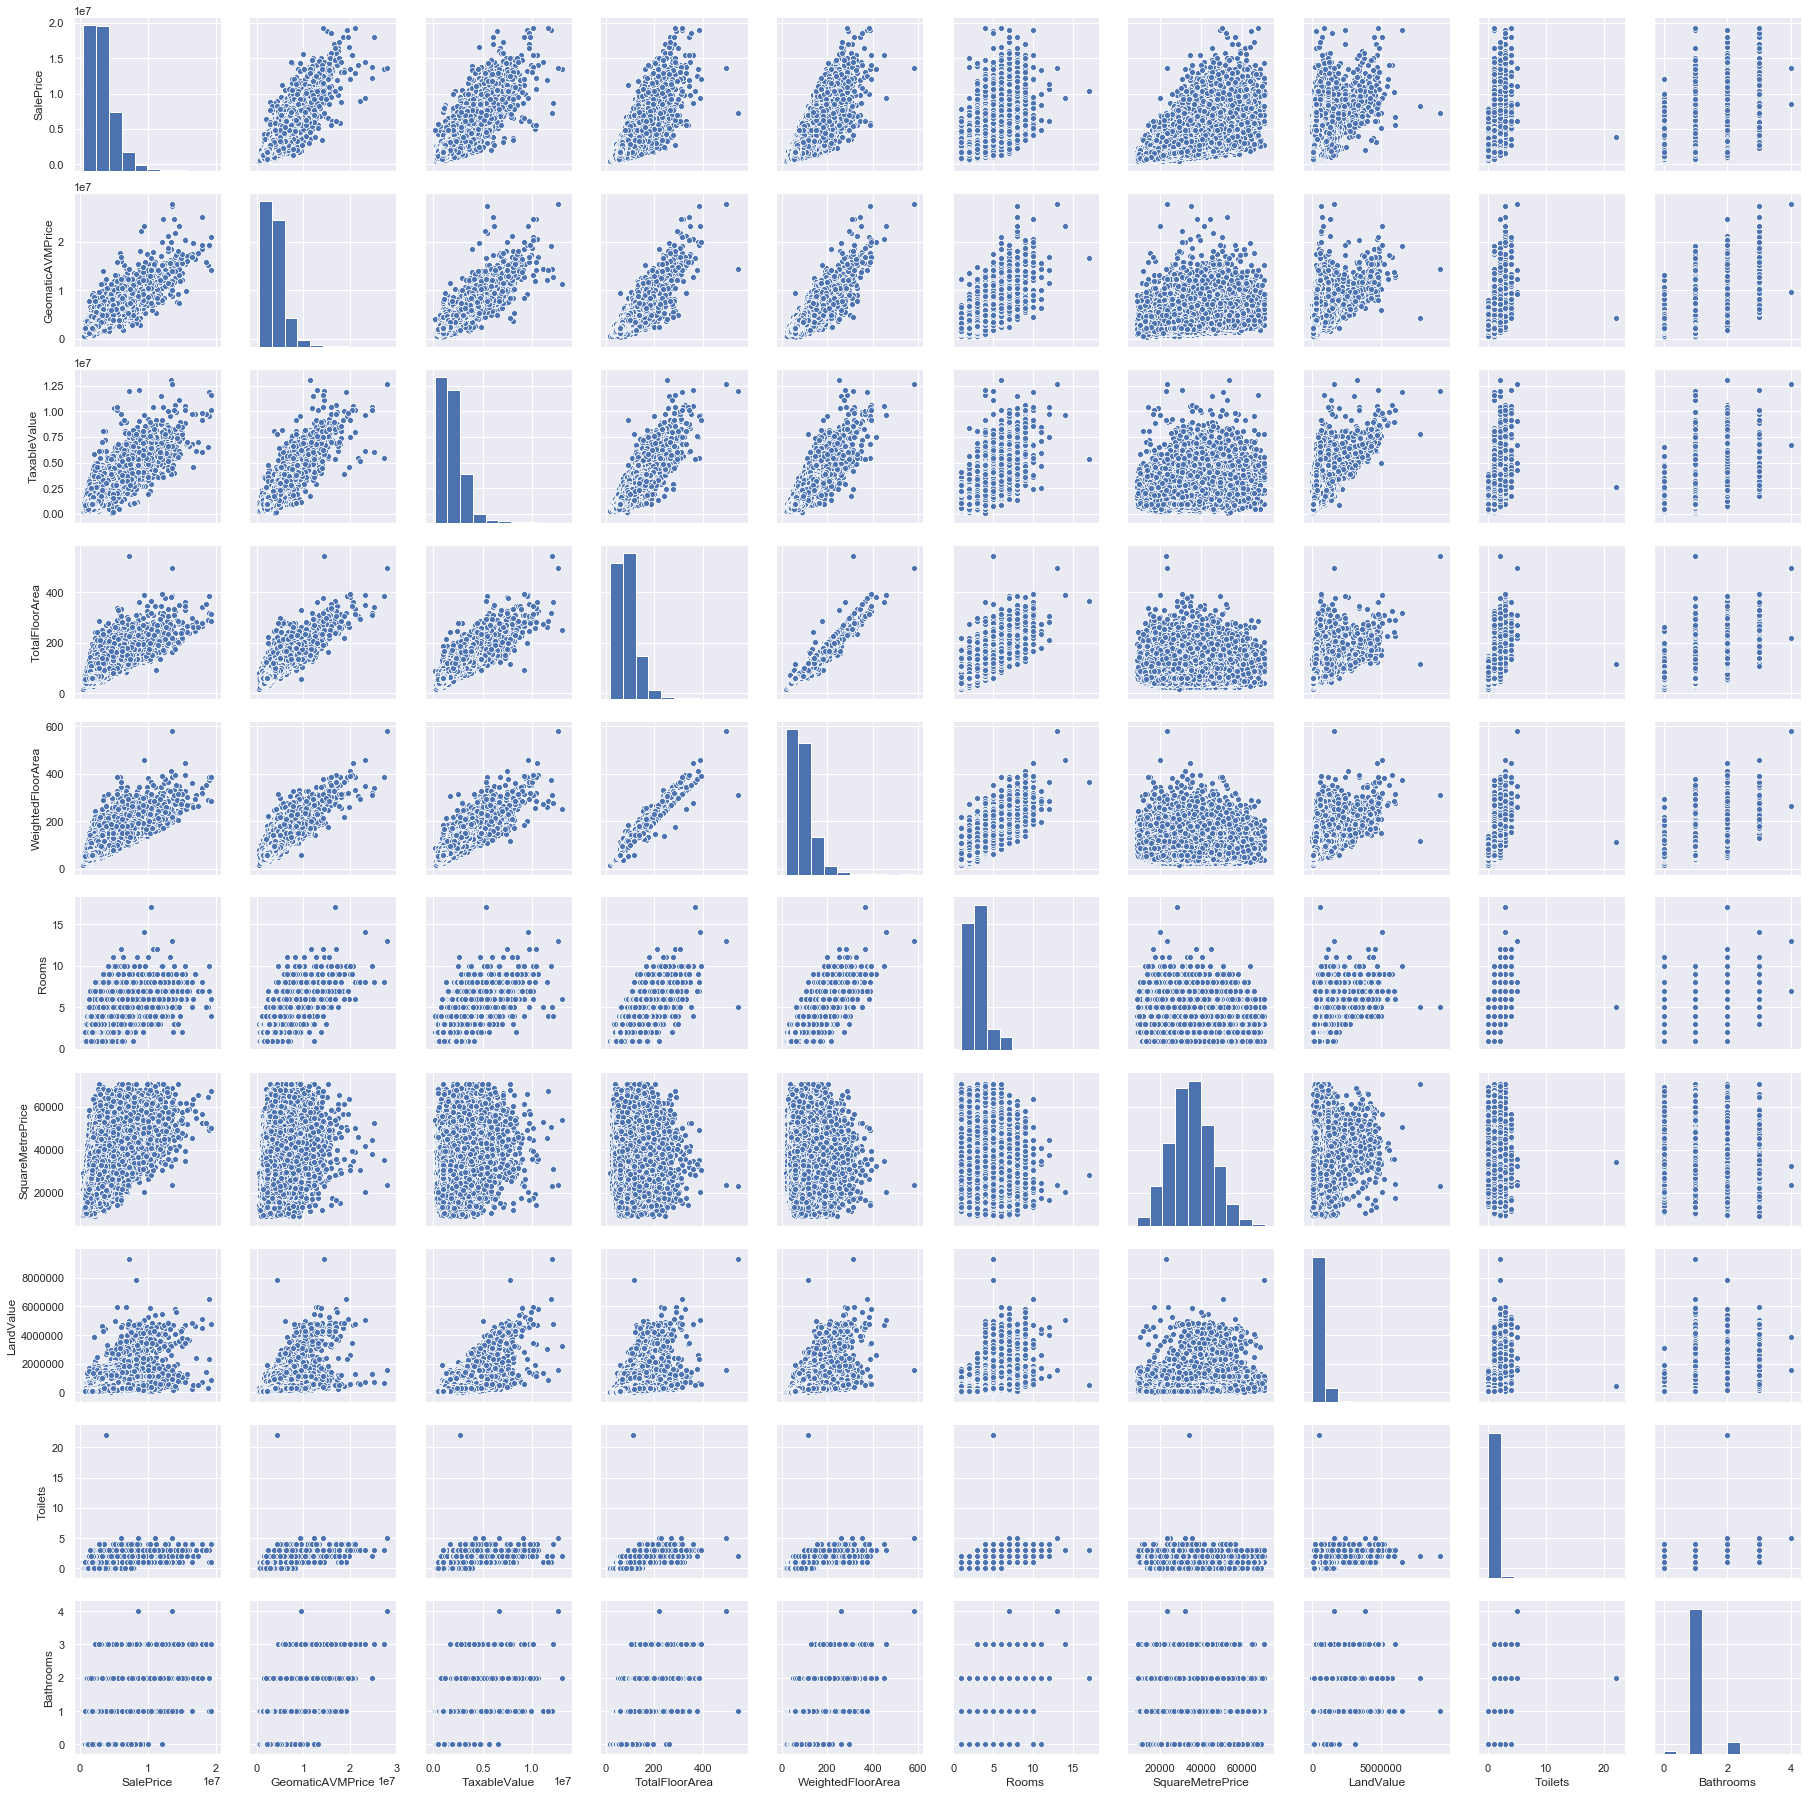

In [63]:
# Scatter plotting the variables most correlated with SalePrice
cols = corr.nlargest(10, 'SalePrice')['SalePrice'].index
sns.set()
sns.pairplot(df[cols], size=2.5)
plt.show()

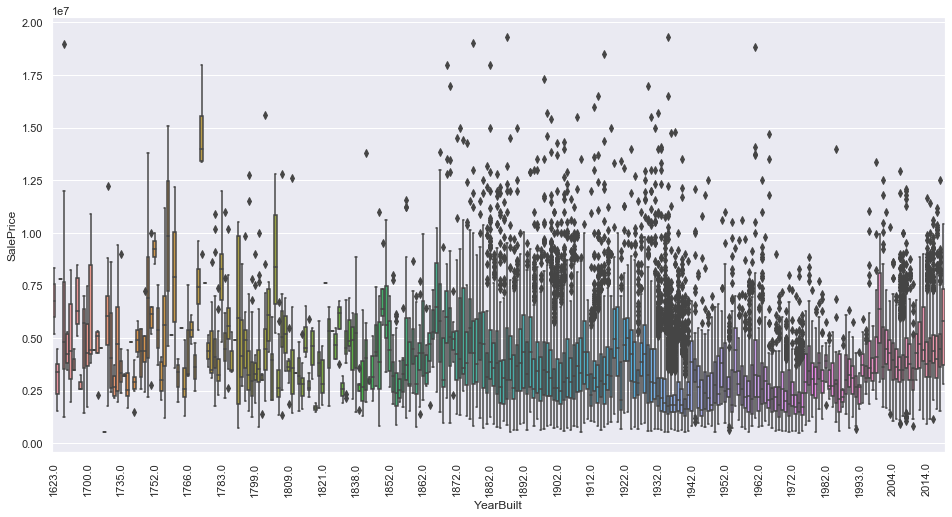

In [64]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
#fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%10 != 0:
        tick.label1.set_visible(False)

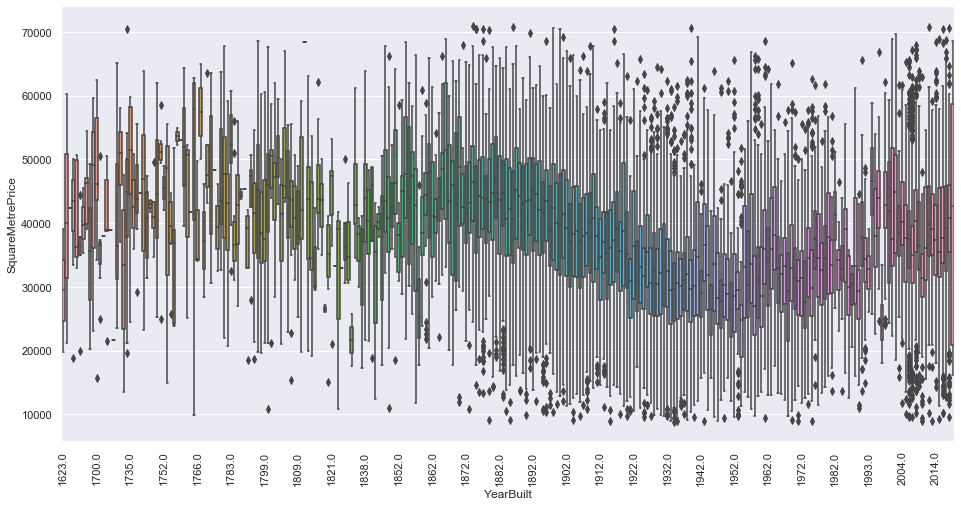

In [65]:
var = 'YearBuilt'
data = pd.concat([df['SquareMetrePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SquareMetrePrice", data=data)
#fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

xticks = ax.xaxis.get_major_ticks()
for i,tick in enumerate(xticks):
    if i%10 != 0:
        tick.label1.set_visible(False)

### Distance

In [66]:
df.iloc[:, 44:].columns

Index(['School', 'RoadTrain', 'Motorway', 'Daycare', 'Metro', 'Doctor',
       'Soccerfield', 'Hospital', 'BusStop', 'Lake', 'Supermarket', 'Pharmacy',
       'STrain', 'Airport', 'Train', 'Library', 'PublicBath', 'Coast',
       'SportsHall', 'Forest', 'PriceIndex', 'OMXC20', 'Mortgage',
       'Unemployed', 'UnemploymentRelativeToLabourForce', 'Births',
       'SquareMetrePrice', 'Quarter', 'Year', 'YearQuarter', 'PriceReduction',
       'HasMultipleLevels', 'BuildAge', 'RemodAfterBuild', 'SalePriceRange',
       'SaleYear', 'DaysTurnoverTime'],
      dtype='object')

In [67]:
col_hvorlangterder = ['School', 'RoadTrain', 'Motorway', 'Daycare', 'Metro', 'Doctor', 'Soccerfield', 
                      'Hospital', 'BusStop', 'Lake', 'Supermarket', 'Pharmacy', 'STrain',
                       'Airport', 'Train', 'Library', 'PublicBath', 'Coast', 'SportsHall', 'Forest', 'SalePrice', 'SquareMetrePrice']

col_hvorlangterder = ['Airport', 'BusStop', 'Coast', 'Daycare', 'Doctor', 'Forest', 
                      'Hospital', 'Lake', 'Library', 'Metro', 'Motorway', 'Pharmacy', 'PublicBath',
                      'RoadTrain', 'School', 'Soccerfield', 'SportsHall', 'STrain', 'Supermarket', 'Train', 'SalePrice', 'SquareMetrePrice']


#col_hvorlangterder = ['', '', 'Motorway', '', '', '', '', 
#                      '', 'BusStop', '', '', '', '',

pd.options.display.float_format = '{:.2f}'.format

StatsDist = np.round(df[col_hvorlangterder].describe(), 2).T[['count', 'mean', 'std', 'min', 'max']]
StatsDist

count       mean        std       min         max
Airport          35702.00    9903.42    3134.53   2481.29    17199.77
BusStop          35702.00     220.55     135.03     12.35     1226.21
Coast            35702.00    2533.01    1918.26     12.69     9517.16
Daycare          35702.00     315.11     185.23     17.54     1489.15
Doctor           35702.00     525.38     389.66     10.09     2603.05
Forest           35702.00    5281.71    1455.62    391.79     8441.41
Hospital         35702.00    2300.80    1183.42     87.07     6451.71
Lake             35702.00    1523.79    1012.24     38.01     5626.16
Library          35702.00     865.75     443.01     16.44     2726.41
Metro            35702.00    1128.14     923.36     31.23     4830.45
Motorway         35702.00    3057.24    1236.23    210.09     5912.88
Pharmacy         35702.00     755.04     425.54     15.13     2776.94
PublicBath       35702.00    1489.78     746.99     24.80     3676.37
RoadTrain        35702.00    5093.76    1925.01    302.62     8944.08
School           35702.00     504.55     284.15     30.23     2320.13
Soccerfield      35702.00     969.40     456.06     52.79     2947.06
SportsHall       35702.00    1375.58     634.71     37.99     4080.93
STrain           35702.00    1603.23    1411.17     57.36     6177.97
Supermarket      35702.00     373.55     250.75      6.13     1901.15
Train            35702.00    2518.17    1302.95     57.36     7884.26
SalePrice        35702.00 3251839.57 1867317.43 510000.00 19300000.00
SquareMetrePrice 35702.00   35378.98   10084.39   8876.92    70886.52

In [68]:
# Do for n=(0-19)
n=2
np.round(df[col_hvorlangterder[n]].loc[df[col_hvorlangterder[n]] < 1000].describe(), 2)[['mean', 'std', 'count', 'max']]


mean     469.71
std      314.20
count   8664.00
max      999.25
Name: Coast, dtype: float64

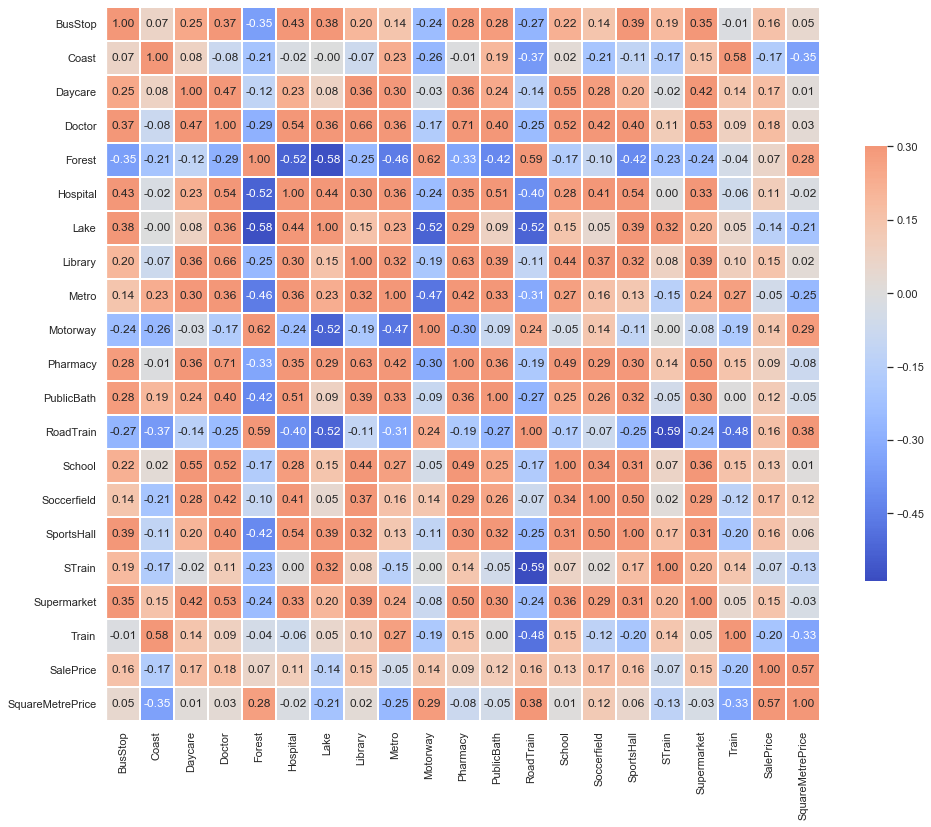

In [69]:
corr_dist = df[col_hvorlangterder].select_dtypes(include=['float64', 'int64']).iloc[:,1:].corr()

g_dist = sns.heatmap(corr_dist,  vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
sns.despine()
g_dist.figure.set_size_inches(16,16)
    
plt.show()

In [70]:
# Correlation between attributes with SalePrice
corr_list_dist = corr_dist['SalePrice'].sort_values(axis=0, ascending=False).iloc[1:]
corr_list_dist
print(corr_list_dist.to_latex())


\begin{tabular}{lr}
\toprule
{} &  SalePrice \\
\midrule
SquareMetrePrice &       0.57 \\
Doctor           &       0.18 \\
Daycare          &       0.17 \\
Soccerfield      &       0.17 \\
RoadTrain        &       0.16 \\
BusStop          &       0.16 \\
SportsHall       &       0.16 \\
Supermarket      &       0.15 \\
Library          &       0.15 \\
Motorway         &       0.14 \\
School           &       0.13 \\
PublicBath       &       0.12 \\
Hospital         &       0.11 \\
Pharmacy         &       0.09 \\
Forest           &       0.07 \\
Metro            &      -0.05 \\
STrain           &      -0.07 \\
Lake             &      -0.14 \\
Coast            &      -0.17 \\
Train            &      -0.20 \\
\bottomrule
\end{tabular}



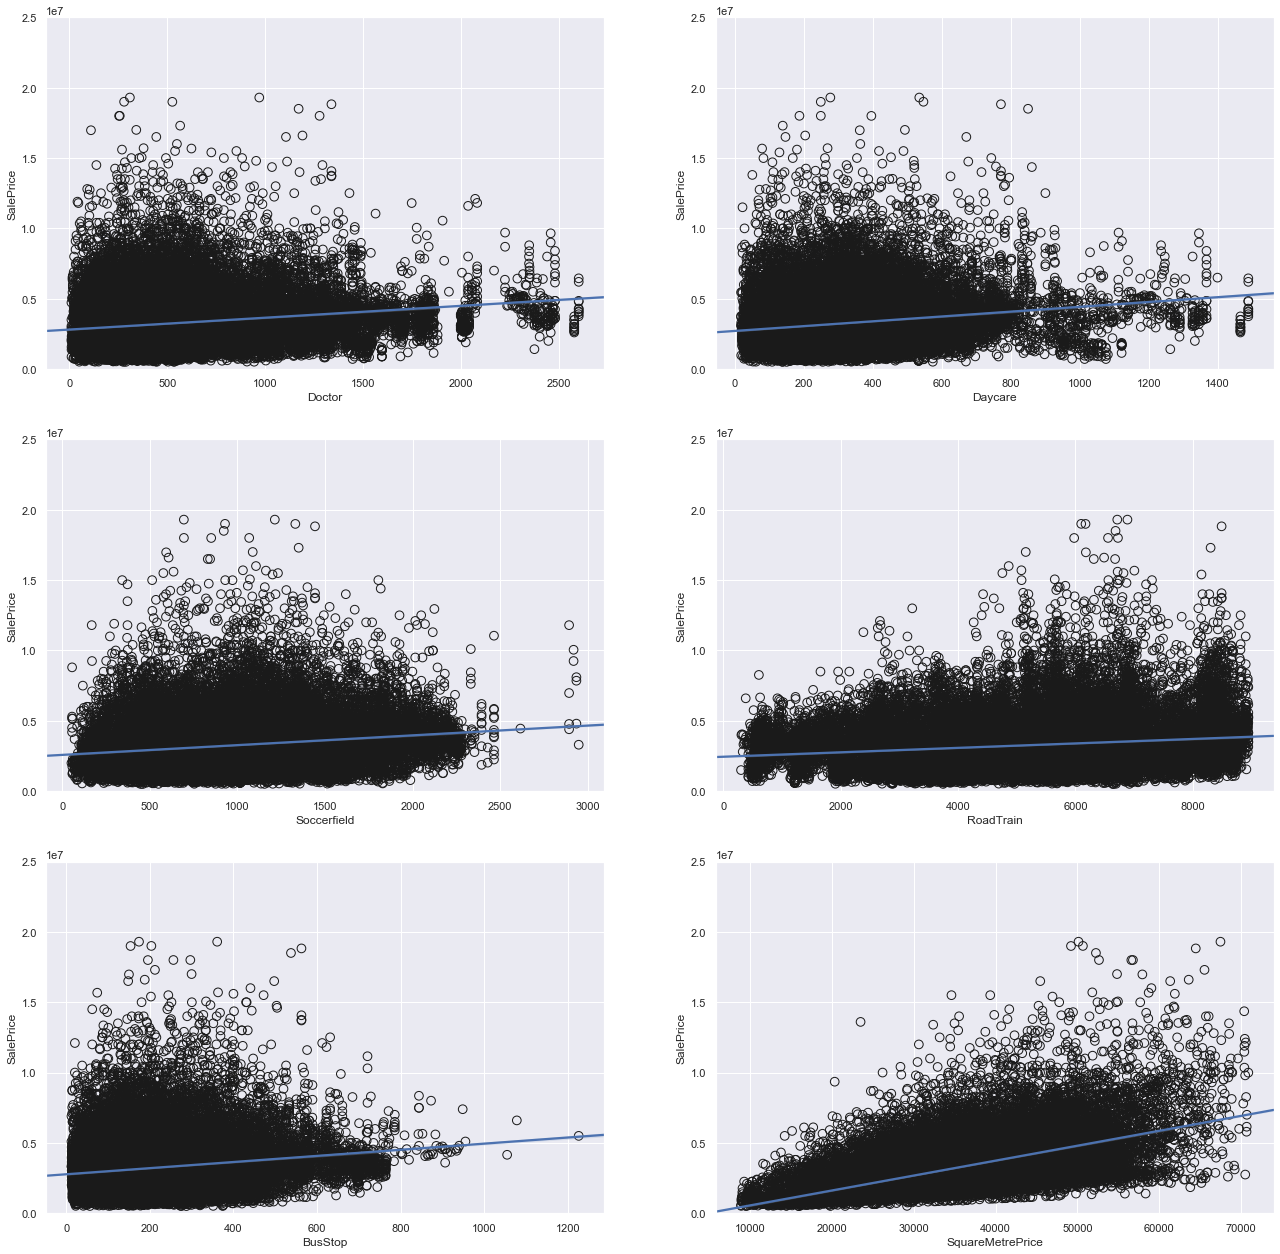

In [71]:
# Scatter plotting the top related to SalePrice
plt.figure(figsize=(22, 22))
k = 6

for i in range(k):
    ii = '32'+str(i)
    plt.subplot(ii)
    feature = corr_list_dist.index.values[i]
    plt.scatter(df[feature], df['SalePrice'], facecolors='none', edgecolors='k', s=75)
    sns.regplot(x=feature, y='SalePrice', data=df, scatter=False, color='b')
    ax=plt.gca()
    ax.set_ylim([0,25000000])

In [74]:
data_crosstab = pd.crosstab(df['WorthPreserving'],
                            df['Type'], margins = True) 

#print(data_crosstab.to_latex())
data_crosstab

Type             Ejerlejlighed  Rækkehus  Villa    All
WorthPreserving                                       
0                        30913       757    708  32378
2                            9        11      5     25
3                          115       376     98    589
4                          217       112    446    775
5                          111       147    996   1254
6                           32        31    472    535
7                            7         5    118    130
8                            3         2      8     13
9                            0         0      3      3
All                      31407      1441   2854  35702

## Turnovertime

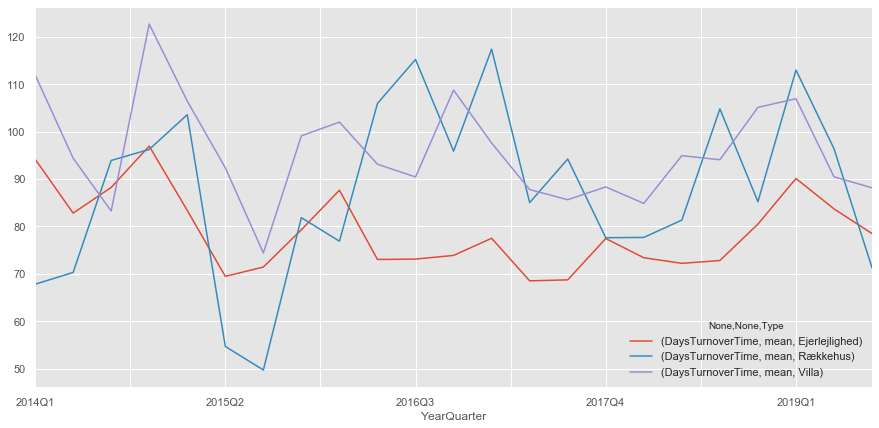

In [77]:
df['DaysTurnoverTime'] = df.TurnoverTime.dt.days


# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
df.groupby(['YearQuarter','Type']).agg({'DaysTurnoverTime':['mean']}).unstack().plot(ax=ax)


In [78]:
GroupCity = np.round(df.groupby('Type', as_index=False).agg({"DaysTurnoverTime": ['count', 'mean','std', 'median', 'min', 'max']}),2)
column_names = ['group', 'N', 'mean', 'std', 'median', 'min', 'max']
GroupCity.columns = column_names 
GroupCity = GroupCity.set_index('group')

#print(GroupCity.to_latex())
GroupCity

N  mean   std  median  min   max
group                                              
Ejerlejlighed  31407 77.88 85.92      51    0  2167
Rækkehus        1441 89.19 92.10      62    0   685
Villa           2854 95.52 95.17      69    0  1156

In [80]:
GroupCity = np.round(df.groupby('City', as_index=False).agg({"DaysTurnoverTime": ['mean','std', 'median', 'min', 'max']}),2)
column_names = ['group', 'mean', 'std', 'median', 'min', 'max']
GroupCity.columns = column_names 
GroupCity = GroupCity.set_index('group')

print(GroupCity.to_latex())
GroupCity

\begin{tabular}{lrrrrr}
\toprule
{} &   mean &    std &  median &  min &   max \\
group           &        &        &         &      &       \\
\midrule
Brønshøj        &  83.88 &  88.13 &      57 &    0 &  1016 \\
Frederiksberg   &  71.16 &  71.53 &      48 &    0 &   831 \\
Frederiksberg C &  77.66 &  78.82 &      54 &    0 &   764 \\
København K     &  96.30 &  99.91 &      69 &    0 &   953 \\
København N     &  68.51 &  79.81 &      42 &    0 &  1214 \\
København NV    &  67.28 &  75.69 &      41 &    0 &  1099 \\
København S     &  80.93 &  90.03 &      54 &    0 &  1451 \\
København SV    &  83.70 & 103.19 &      57 &    0 &  2167 \\
København V     &  85.61 &  96.38 &      55 &    0 &   986 \\
København Ø     &  78.93 &  78.55 &      57 &    0 &  1170 \\
Nordhavn        & 172.40 & 181.01 &     114 &    0 &   880 \\
Valby           &  78.78 &  80.56 &      52 &    0 &   734 \\
Vanløse         &  74.64 &  79.35 &      46 &    0 &   694 \\
\bottomrule
\end{tabular}



mean    std  median  min   max
group                                           
Brønshøj         83.88  88.13      57    0  1016
Frederiksberg    71.16  71.53      48    0   831
Frederiksberg C  77.66  78.82      54    0   764
København K      96.30  99.91      69    0   953
København N      68.51  79.81      42    0  1214
København NV     67.28  75.69      41    0  1099
København S      80.93  90.03      54    0  1451
København SV     83.70 103.19      57    0  2167
København V      85.61  96.38      55    0   986
København Ø      78.93  78.55      57    0  1170
Nordhavn        172.40 181.01     114    0   880
Valby            78.78  80.56      52    0   734
Vanløse          74.64  79.35      46    0   694

In [81]:
GroupCityType = np.round(df.groupby(['City', 'Type']).agg({"DaysTurnoverTime": ['count', 'mean','std', 'median', 'min', 'max']}),2)
GroupCityType


DaysTurnoverTime                               
                                         count   mean    std median min   max
City            Type                                                         
Brønshøj        Ejerlejlighed              898  70.22  81.02  45.00   0  1016
                Rækkehus                   152  96.62  92.05  69.00   1   460
                Villa                      770  97.31  92.84  72.50   0   892
Frederiksberg   Ejerlejlighed             3665  69.69  69.01  47.00   0   831
                Rækkehus                    88  75.52  71.52  57.00   0   344
                Villa                      158 102.73 111.38  64.50   0   762
Frederiksberg C Ejerlejlighed             1749  77.67  79.07  54.00   0   764
                Villa                       22  76.59  57.08  74.00   0   212
København K     Ejerlejlighed             2452  95.86  99.80  69.00   0   953
                Rækkehus                    92 108.50 103.36  66.00   2   403
                Villa                        3  75.33  80.70  44.00  15   167
København N     Ejerlejlighed             2575  68.53  79.82  42.00   0  1214
                Villa                        1  23.00    nan  23.00  23    23
København NV    Ejerlejlighed             1640  63.19  68.14  36.00   0   704
                Rækkehus                    56  94.57 108.80  61.00   0   551
                Villa                      184  95.43 111.85  59.50   4  1099
København S     Ejerlejlighed             6874  78.88  89.00  52.00   0  1451
                Rækkehus                   409  93.82  94.72  69.00   0   588
                Villa                      777  92.31  95.14  64.00   0  1156
København SV    Ejerlejlighed             1397  83.75 103.20  57.00   0  2167
                Villa                        1  13.00    nan  13.00  13    13
København V     Ejerlejlighed             1889  85.56  96.36  55.00   0   986
                Rækkehus                    31  88.61  99.55  70.00   2   501
København Ø     Ejerlejlighed             4261  78.34  77.61  57.00   0  1170
                Rækkehus                   199  80.86  89.00  55.00   0   685
                Villa                       36 138.58 104.36 134.50   1   354
Nordhavn        Ejerlejlighed              320 170.50 180.83 111.50   0   880
                Rækkehus                     9 239.89 184.68 164.00  47   511
Valby           Ejerlejlighed             2206  75.06  77.53  48.50   0   595
                Rækkehus                   296  80.77  76.90  60.00   0   357
                Villa                      490  94.34  93.34  65.00   0   734
Vanløse         Ejerlejlighed             1481  68.73  74.68  42.00   0   694
                Rækkehus                   109  79.19  96.41  41.00   1   651
                Villa                      412  94.67  87.17  68.50   0   480

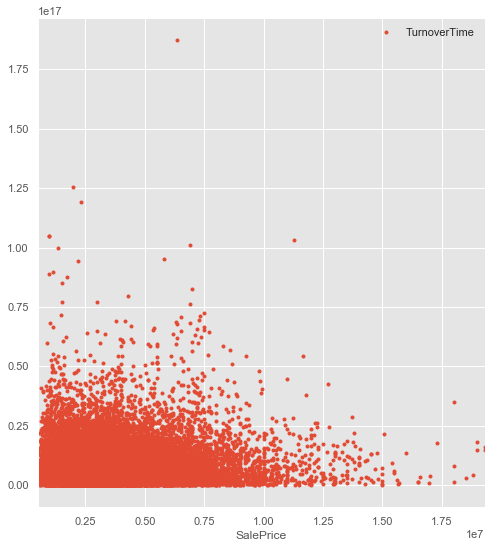

In [82]:
df.plot(x='SalePrice', y='TurnoverTime', style='.')



In [83]:
df.TurnoverTime.mean()

Timedelta('79 days 17:56:30.667189')